# 2022. 09. 07.

In [2]:
from mcbj import *
from tqdm.notebook import tqdm
import filter_traces
import plots
import pandas as pd
from matplotlib import rcParams
from pathlib import Path
date = "22_09_07"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
import numpy as np
from matplotlib.ticker import MultipleLocator

import utils

ModuleNotFoundError: No module named 'mcbj'

## 201-1000 clean traces
### rate = 4

In [15]:
hist_1 = Histogram(home_folder, start_trace=201, end_trace=1000)

hist_1.calc_stats(align_at=1e-5, interpolate=False,
                    range_pull=(-0.4, 0.2), range_push=(-1.5, 0.5), xbins_pull=250, xbins_push=400,
                    plateau_length_bins=100)

Processing break junction files:   0%|          | 0/9 [00:00<?, ?it/s]

Pull 2D histogram created from 800 traces
Push 2D histogram created from 800 traces


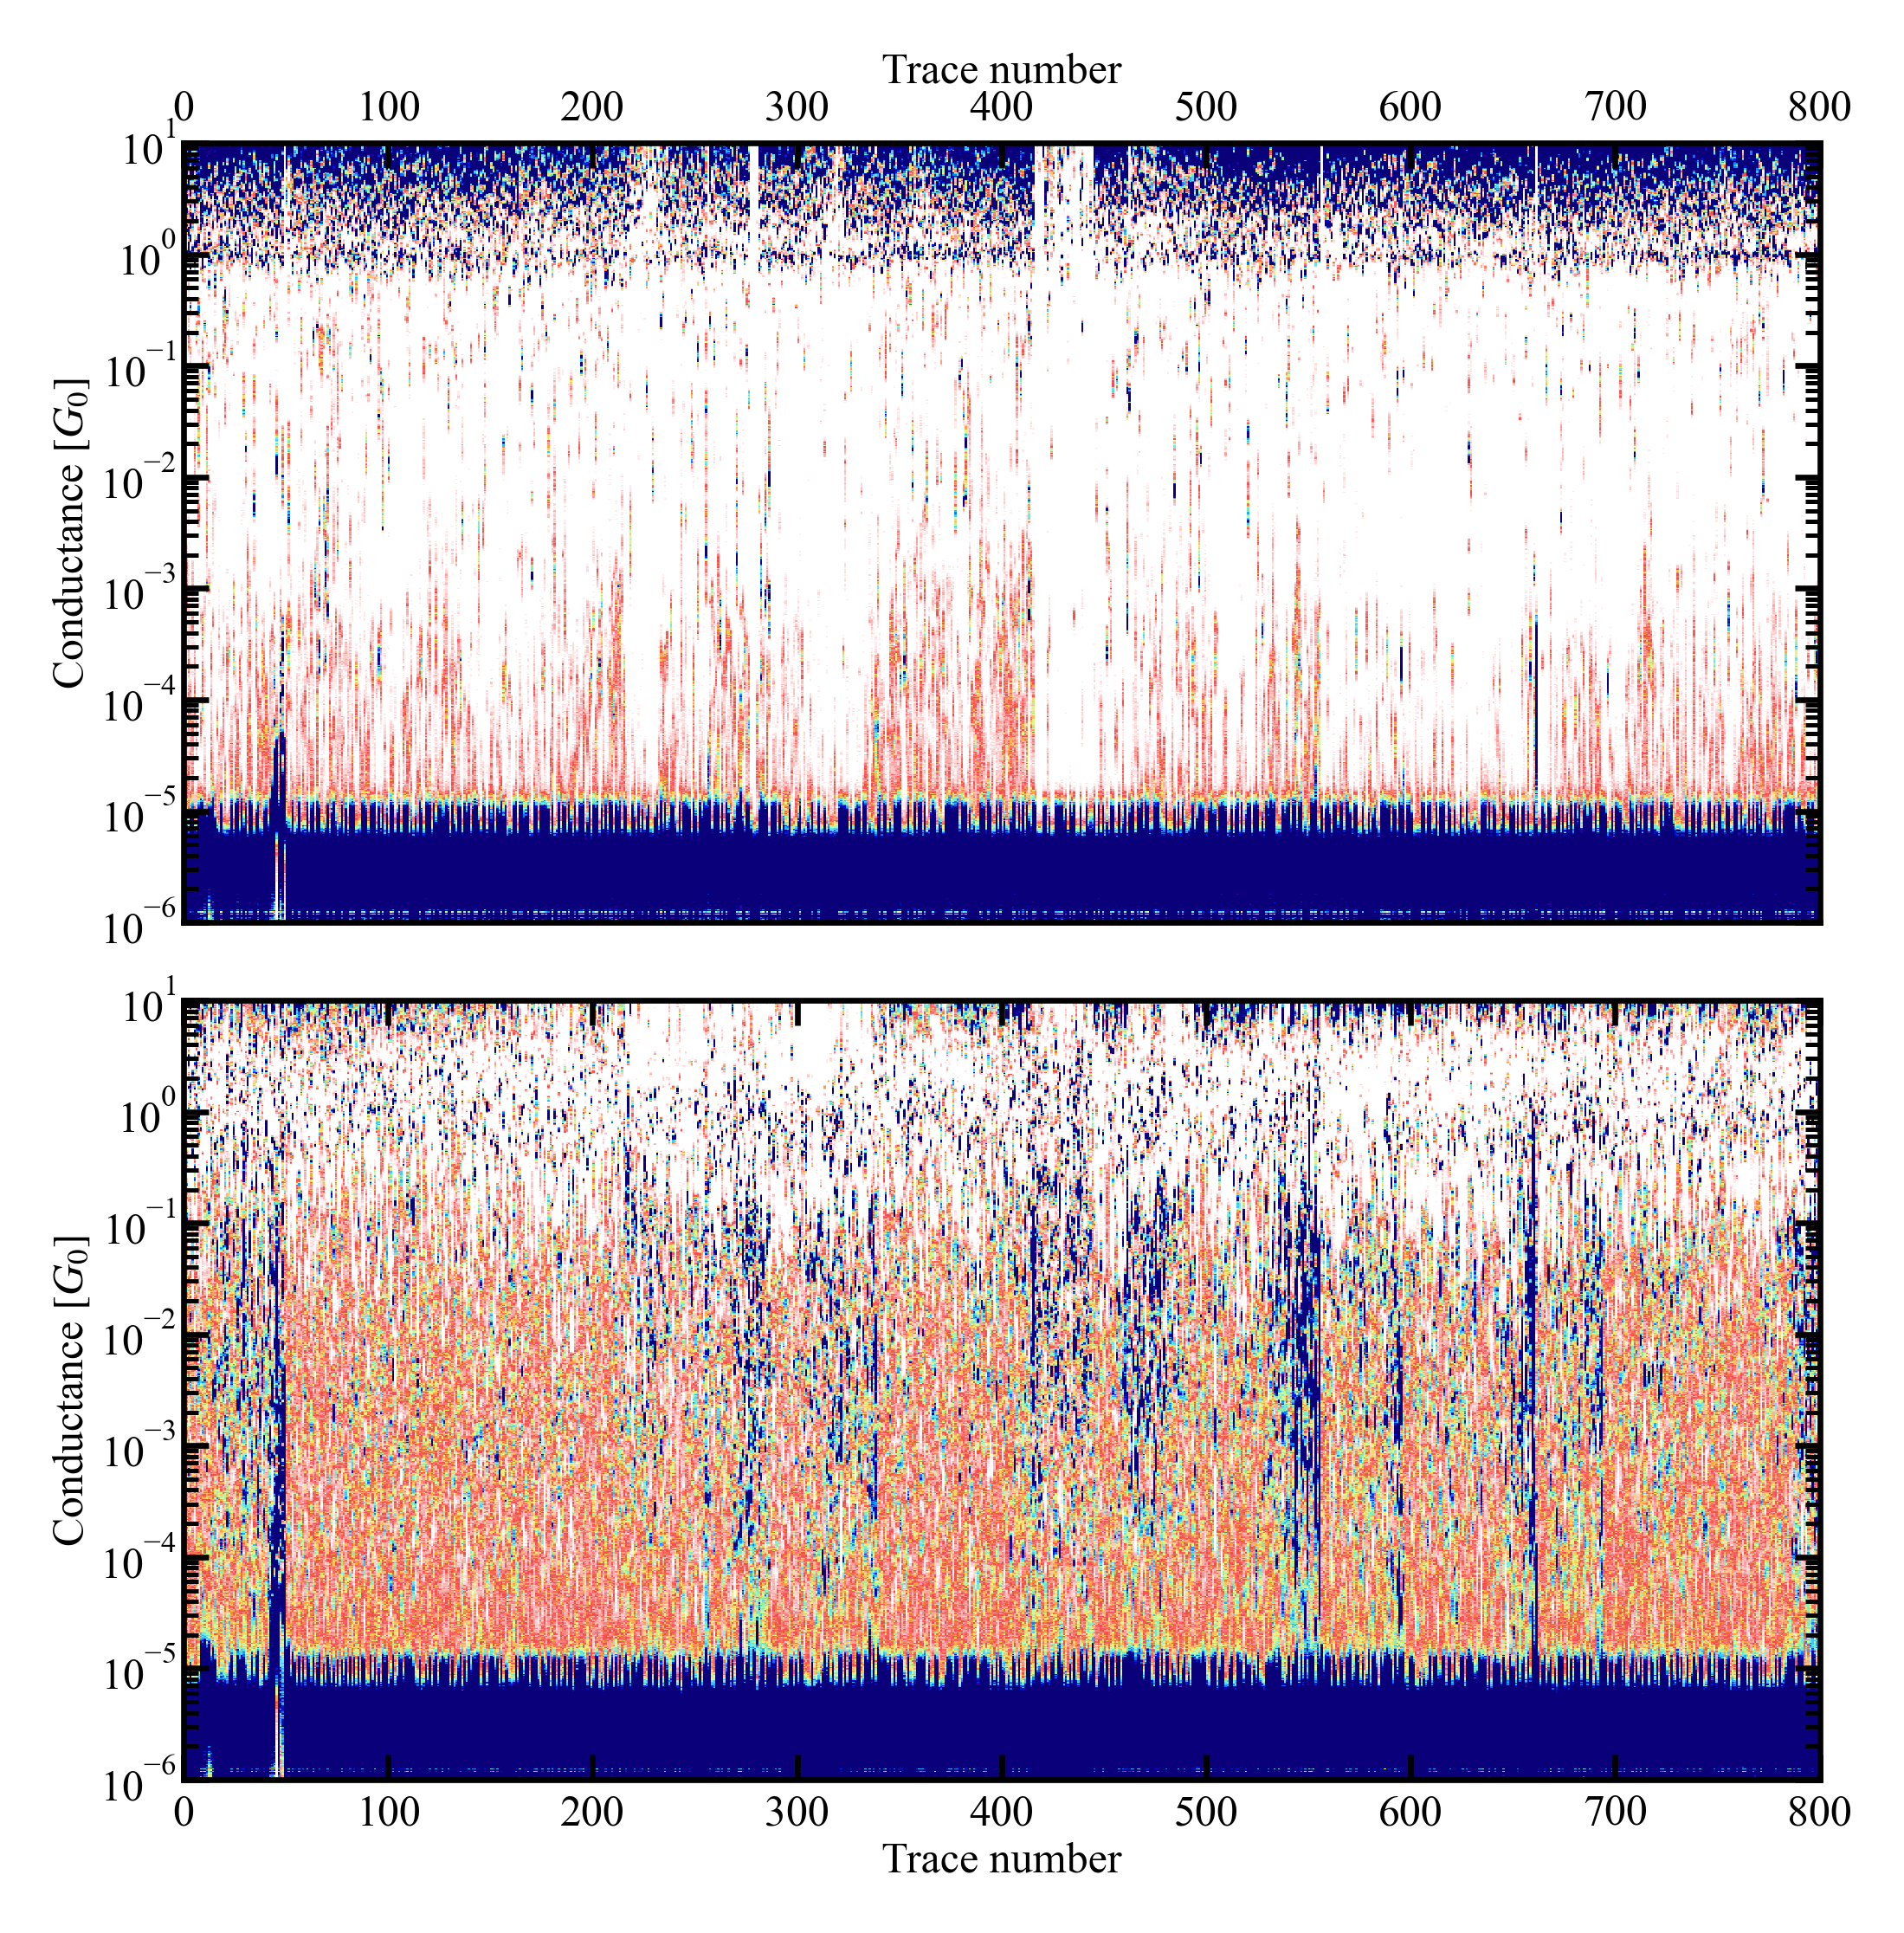

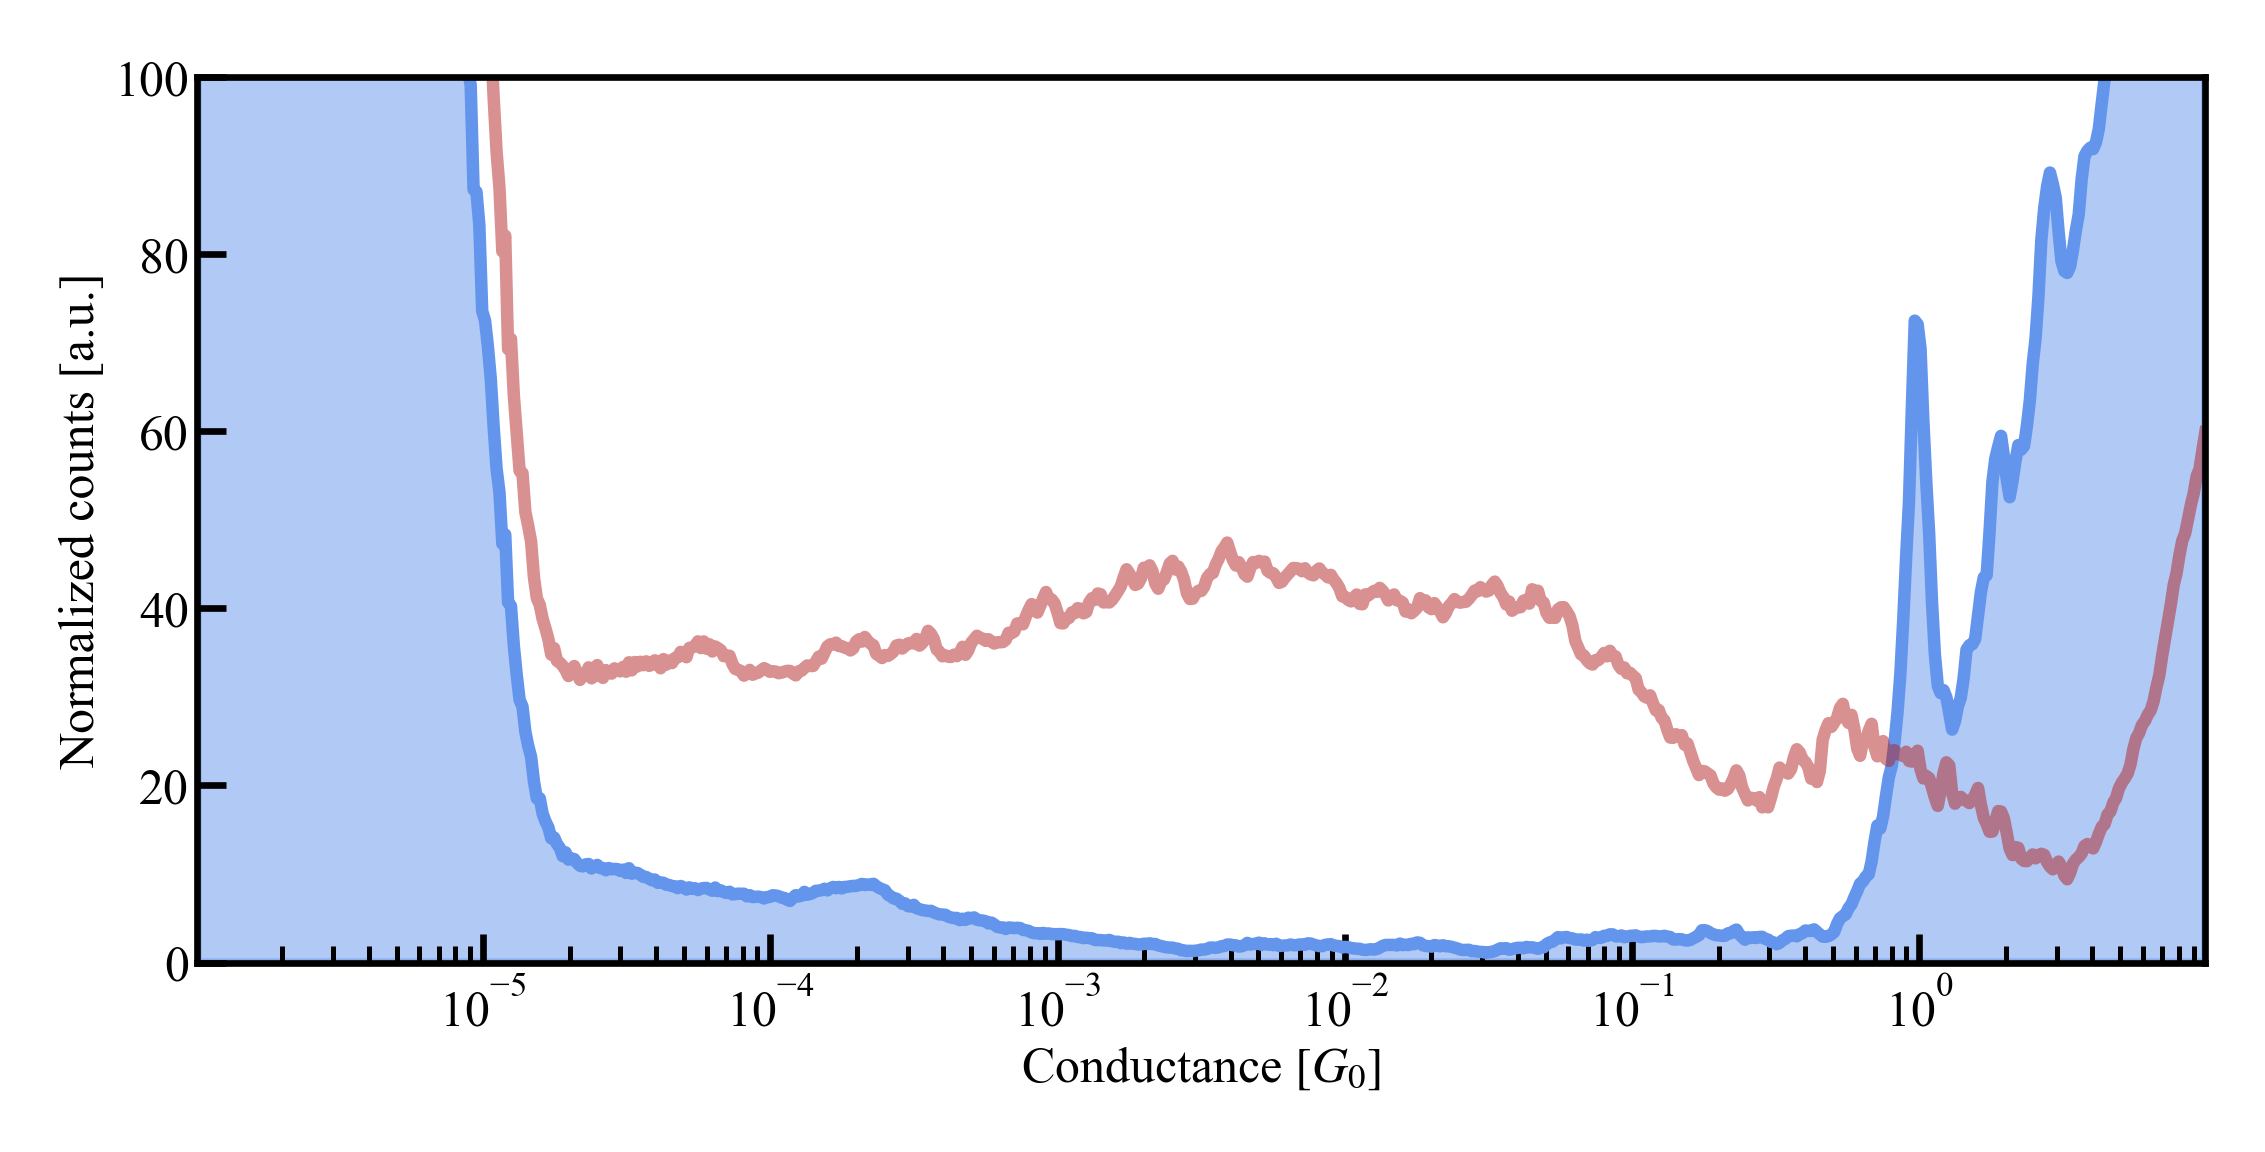

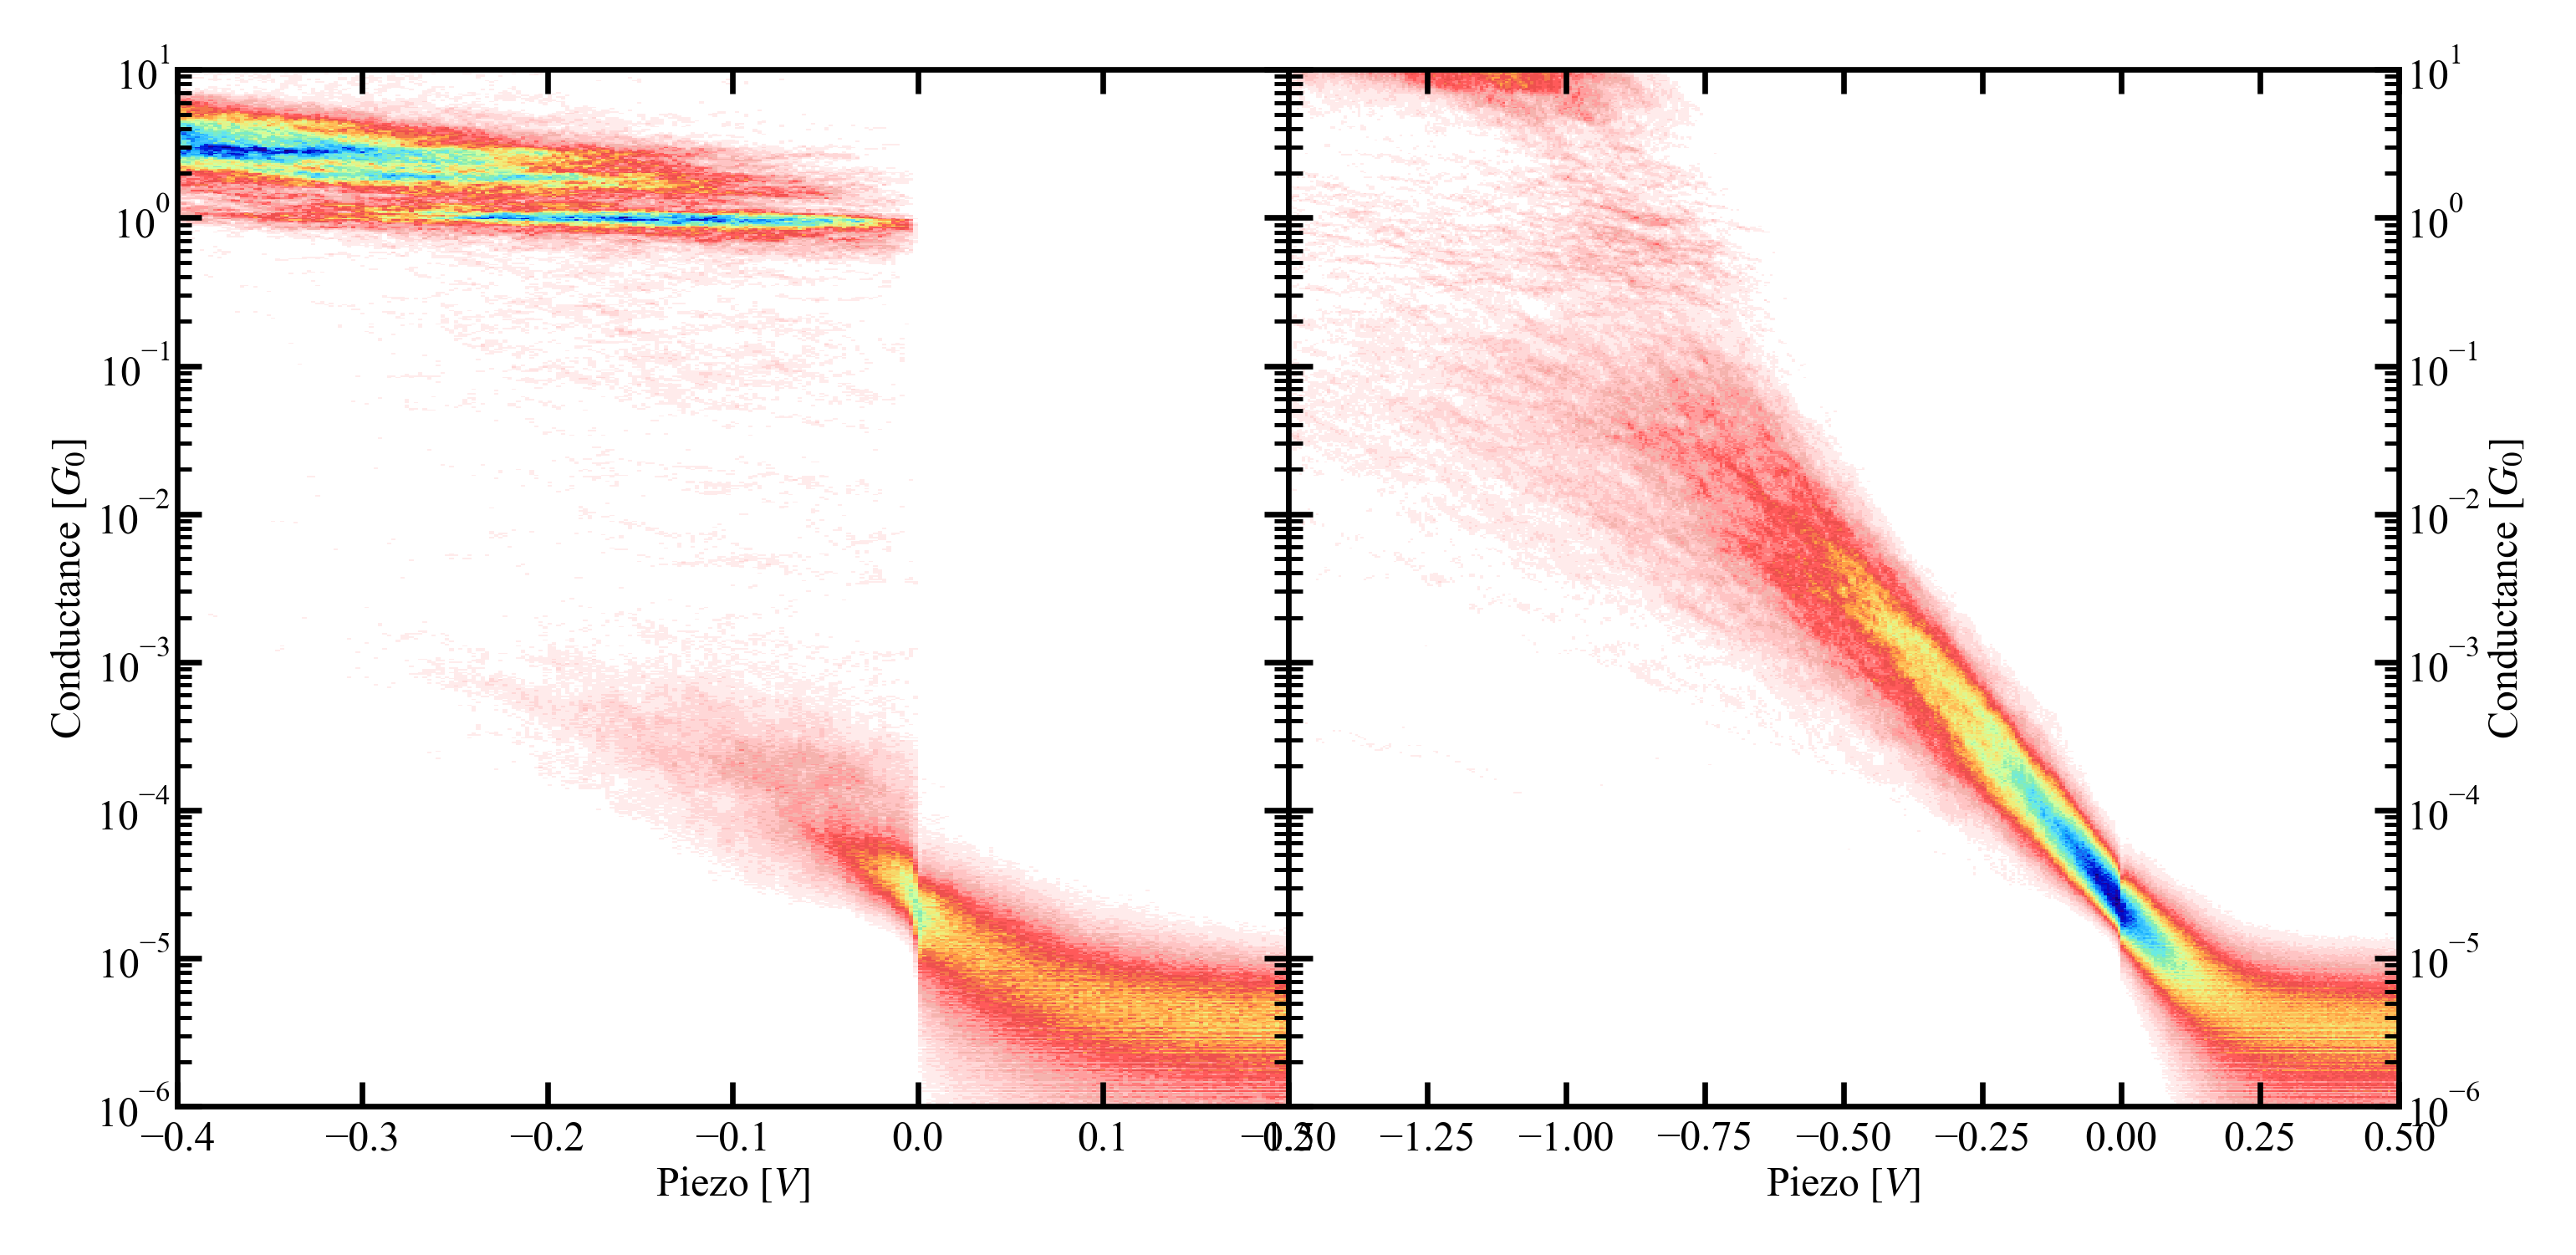

In [16]:
ax_temp_pull, ax_temp_push = hist_1.plot_temporal_hist(vmax=100)
# ax_temp_pull.set_xticks(np.linspace(start=0, stop=hist_2.temporal_hist_pull.shape[0], num=9, endpoint=True))
# ax_temp_pull.set_xticklabels(np.linspace(start=1, stop=hist_2.temporal_hist_pull.shape[0]+1, num=9, endpoint=True))
ax_1d = hist_1.plot_hist_1d(ylims=(0, 100))
ax_pull, ax_push = hist_1.plot_hist_2d_both()

In [17]:
hist_1.calc_hist_2d(align_at=0.5, range_pull=(-0.2, 0.4), range_push=(-0.5, 1.5),
                    xbins_pull=200, xbins_push=250, interpolate=False)

Calculating 2D conductance-displacement histograms:   0%|          | 0/9 [00:00<?, ?it/s]

2D histogram pull direction created from 800 traces
2D histogram push direction created from 800 traces


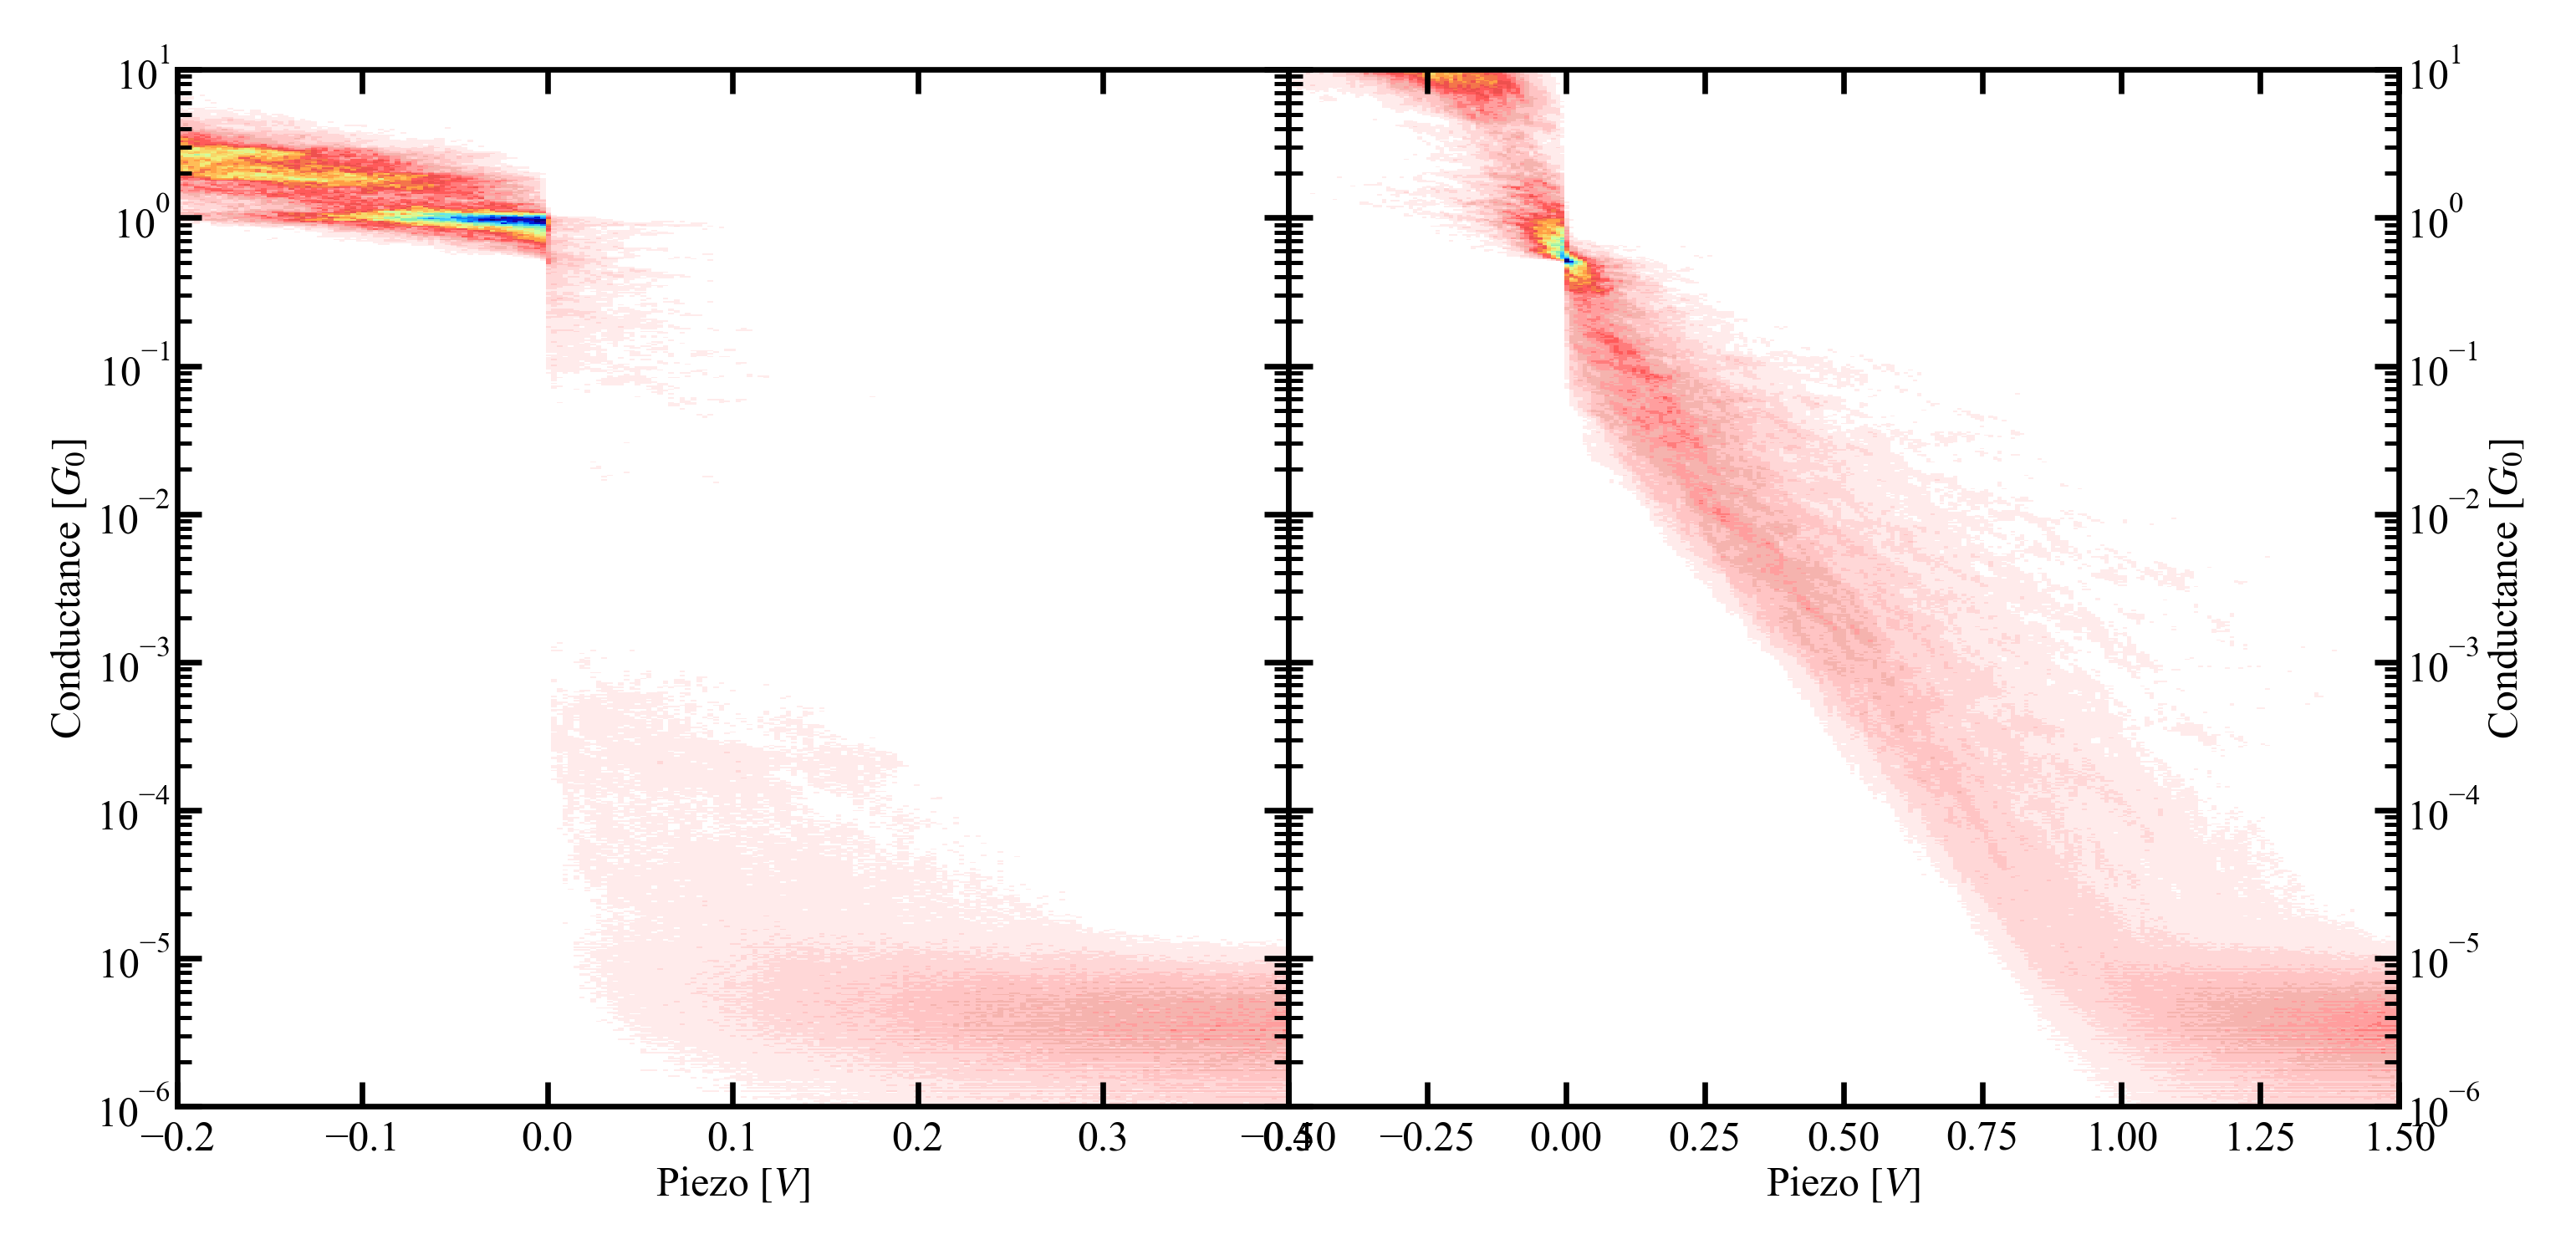

In [18]:
ax_pull, ax_push = hist_1.plot_hist_2d_both()

## 1201-2200 after evaporation
### rate=0.5

In [2]:
hist_BPY = Histogram(home_folder, start_trace=1202, end_trace=2200)

hist_BPY.calc_stats(align_at=1e-5, interpolate=False,
                    range_pull=(-0.4, 0.2), range_push=(-1.5, 0.5), xbins_pull=250, xbins_push=400,
                    plateau_length_bins=100)

Processing break junction files:   0%|          | 0/11 [00:00<?, ?it/s]

Pull 2D histogram created from 999 traces
Push 2D histogram created from 999 traces


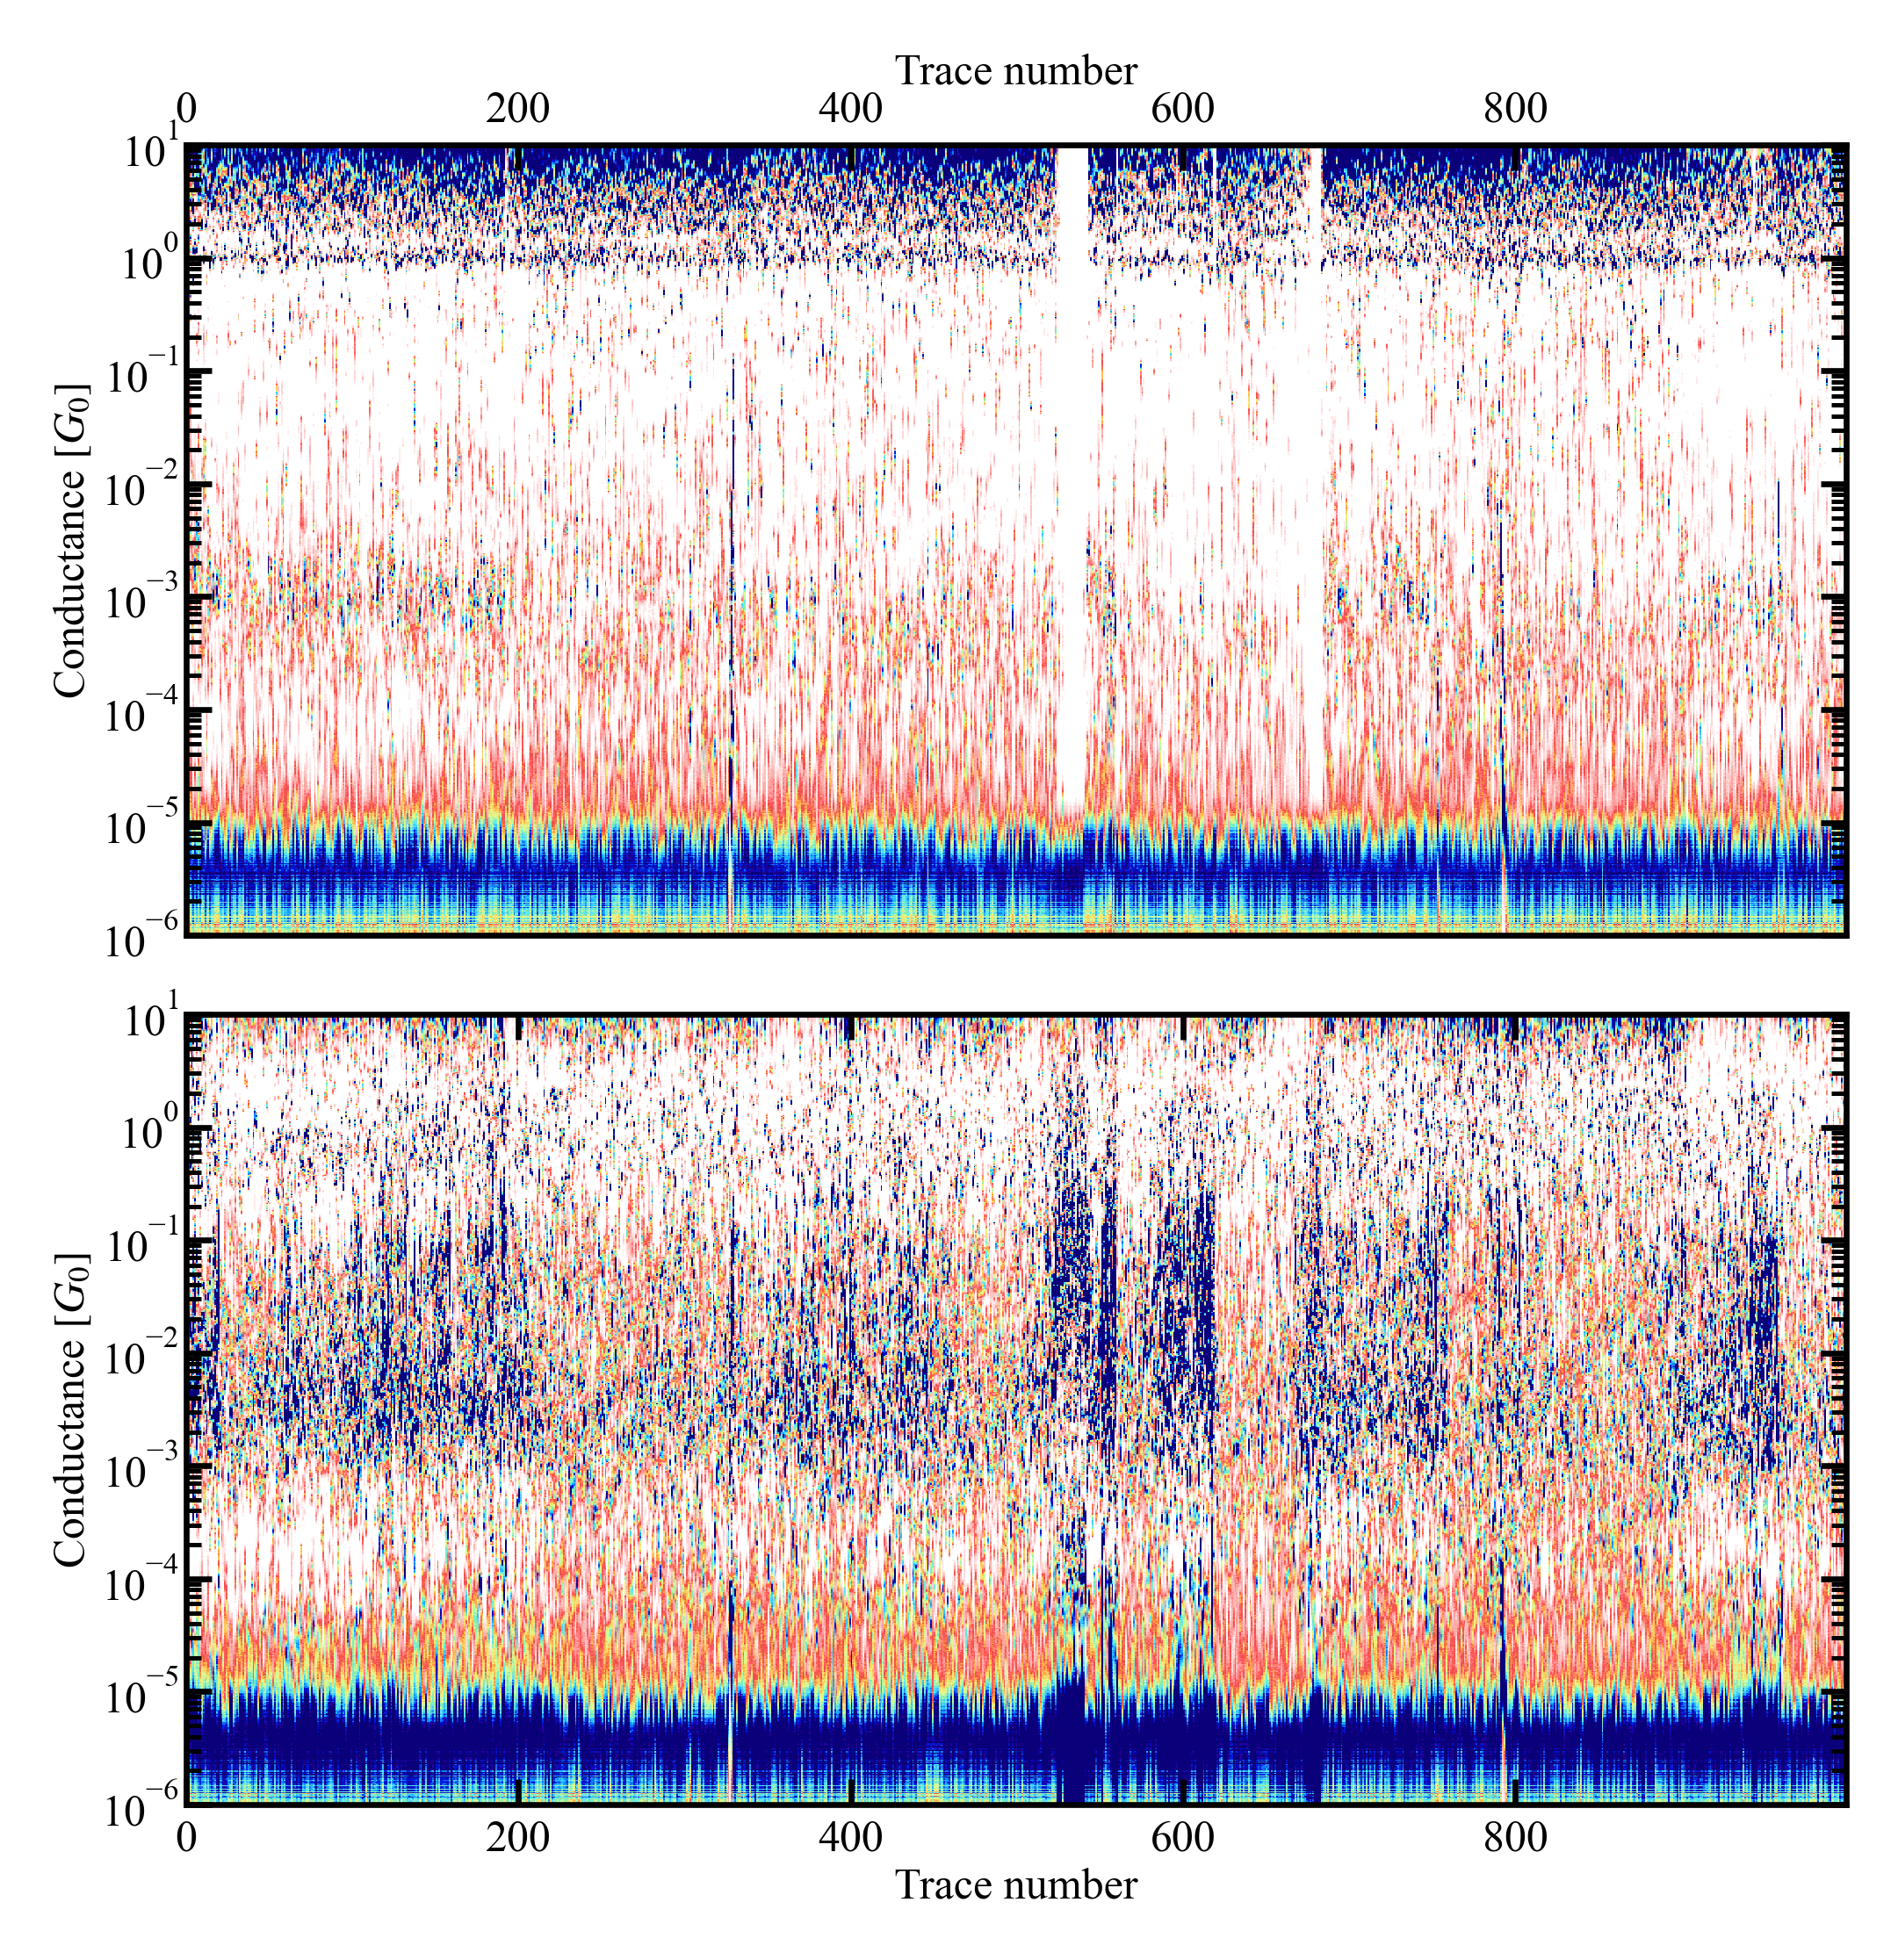

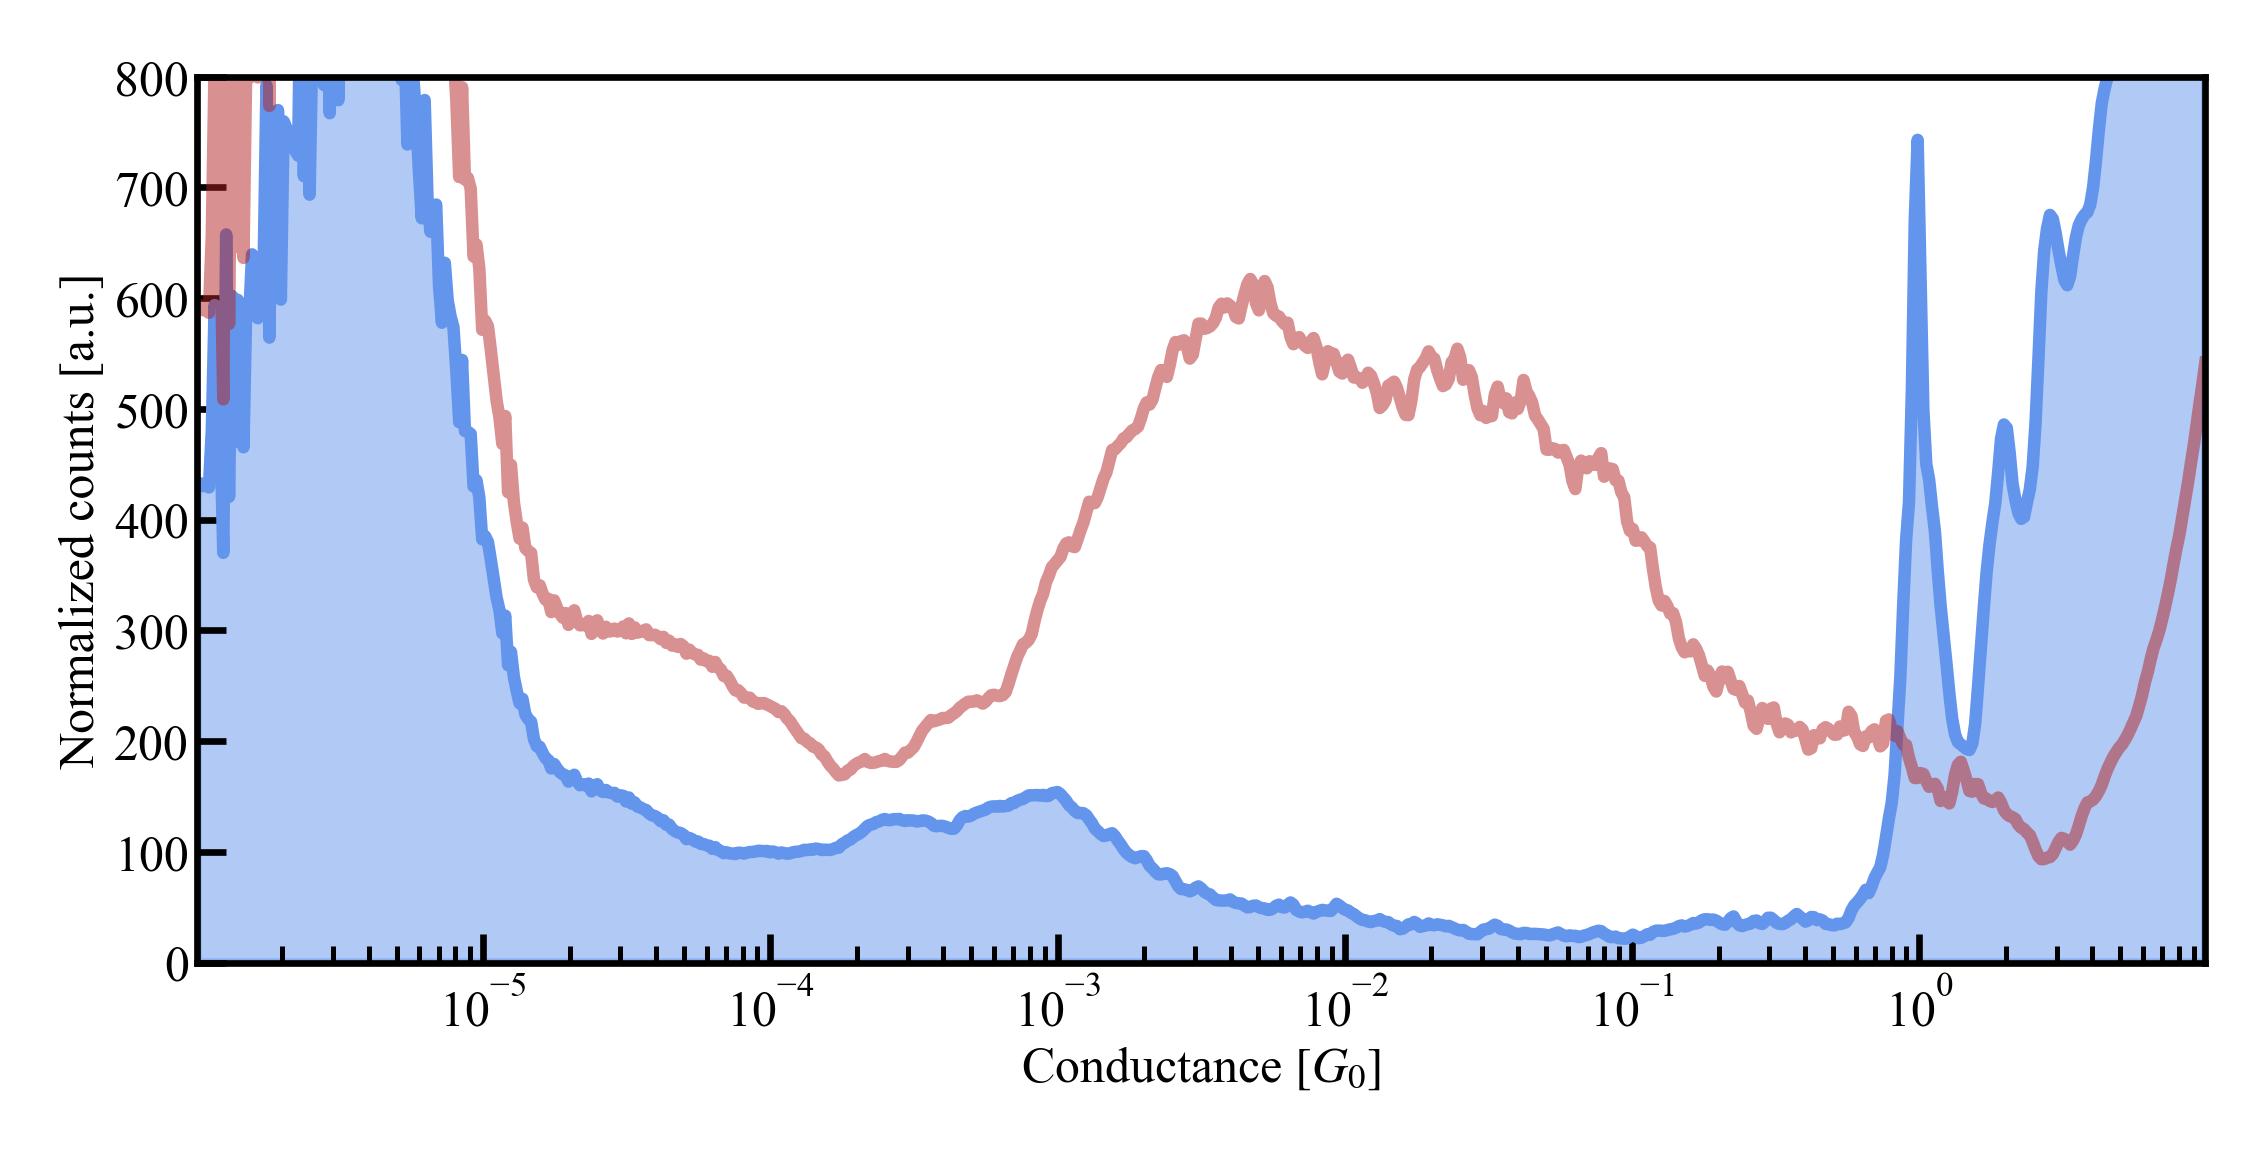

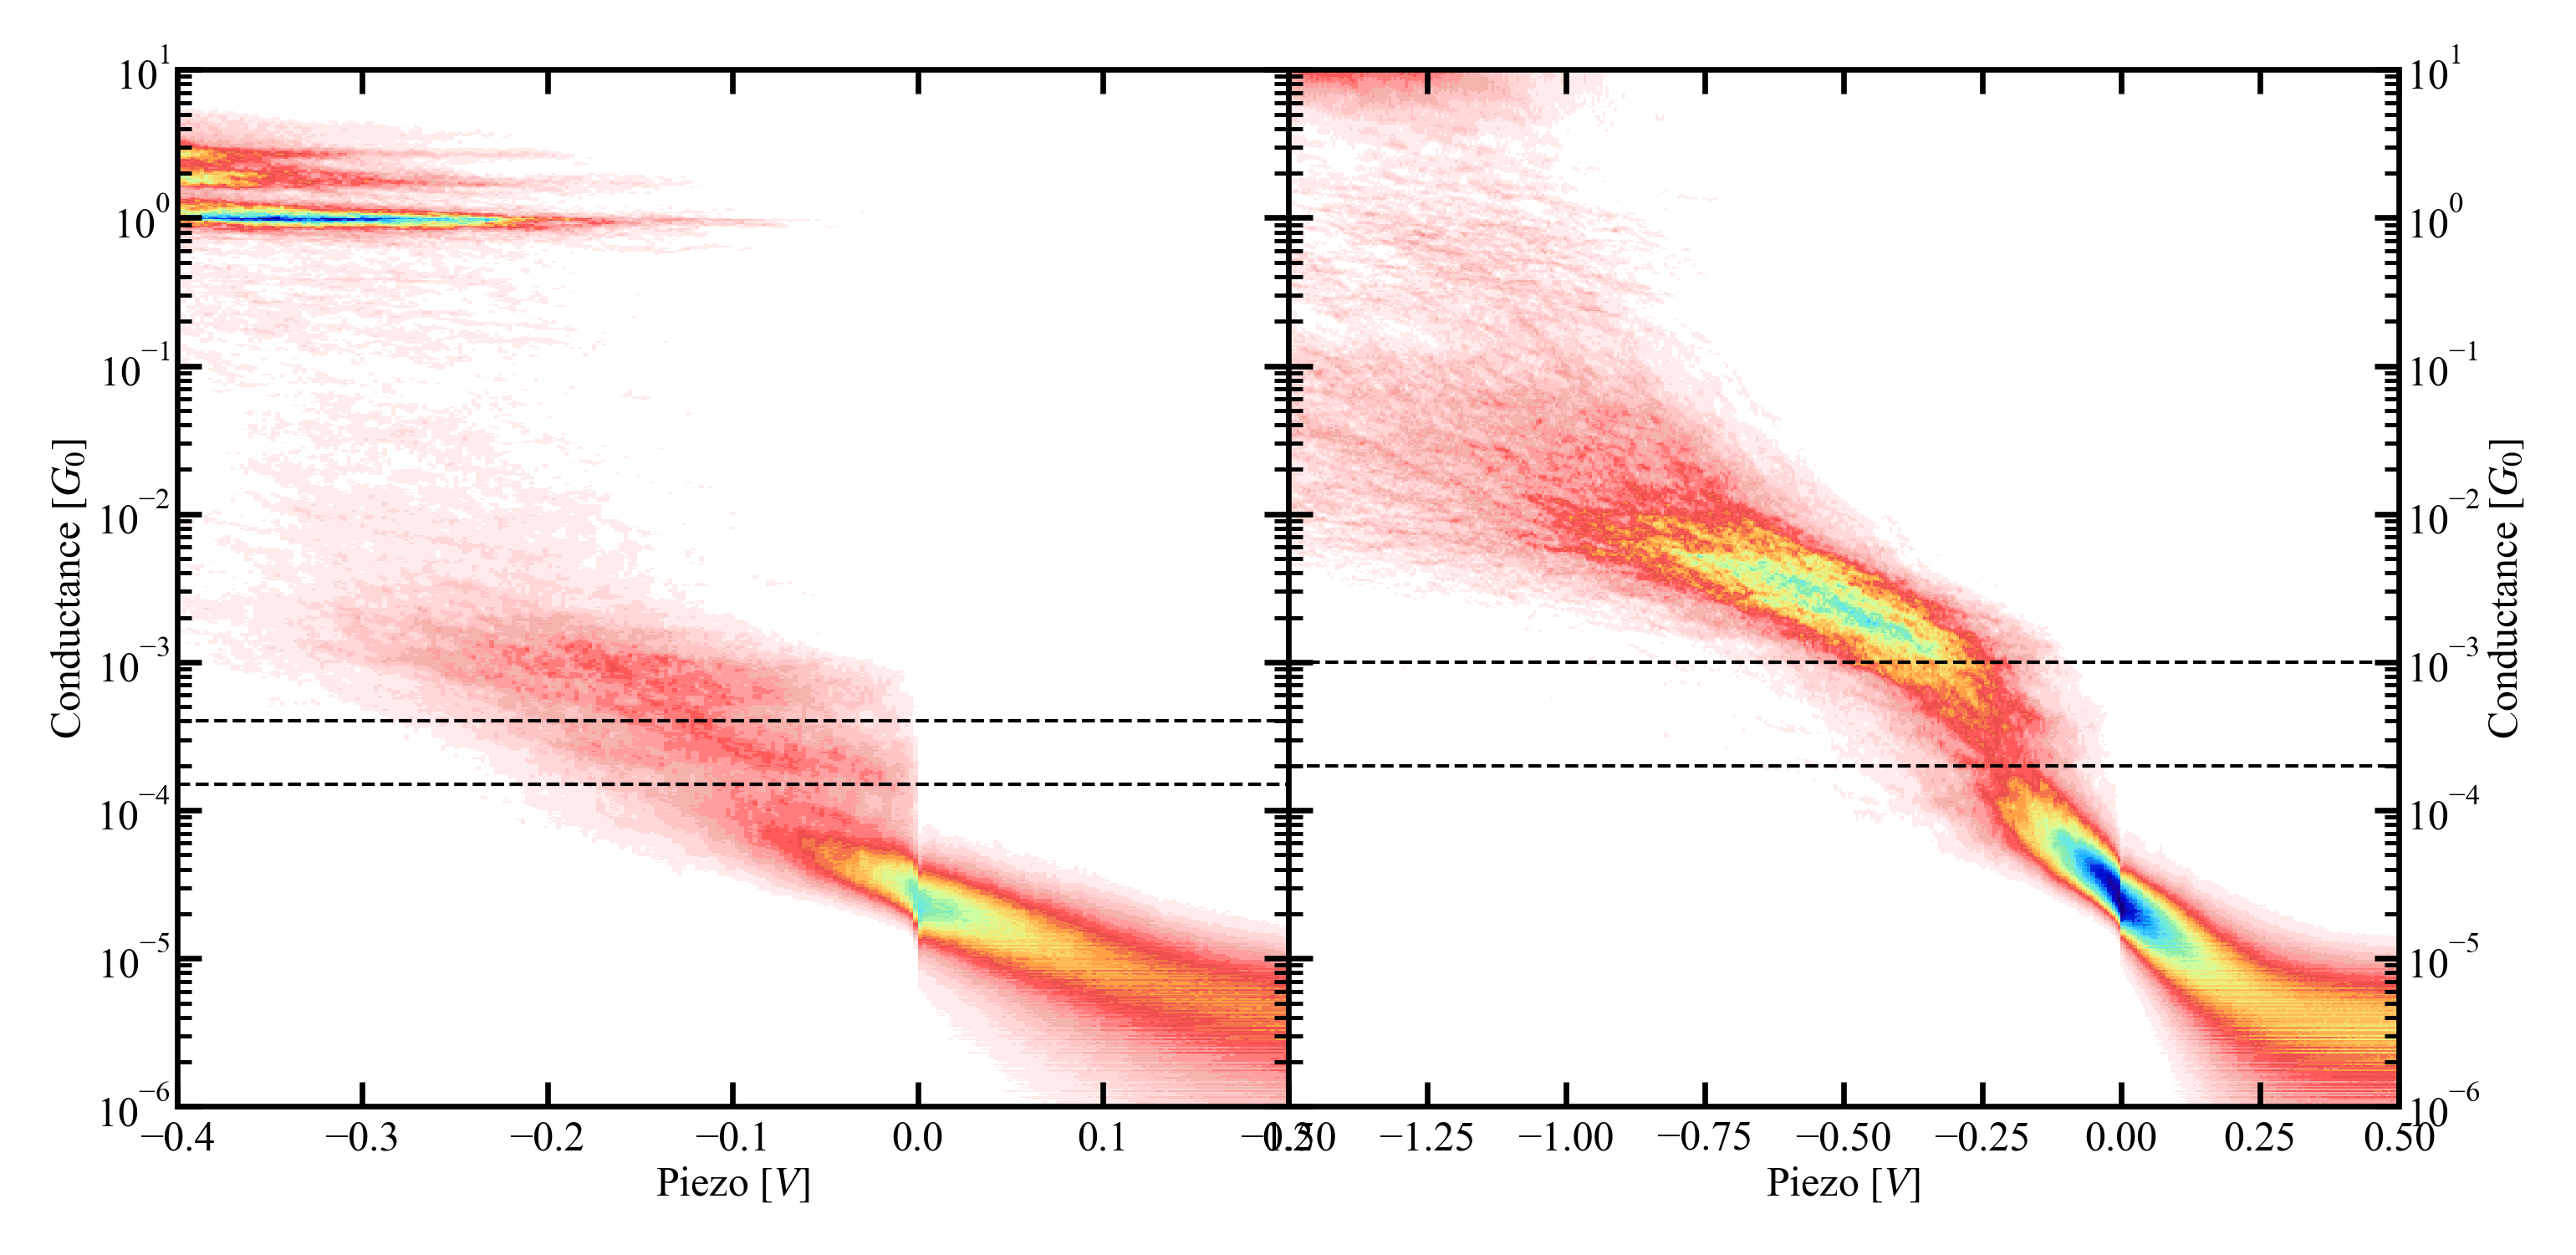

In [9]:
ax_temp_pull, ax_temp_push = hist_BPY.plot_temporal_hist(vmax=1000)
# ax_temp_pull.set_xticks(np.linspace(start=0, stop=hist_2.temporal_hist_pull.shape[0], num=9, endpoint=True))
# ax_temp_pull.set_xticklabels(np.linspace(start=1, stop=hist_2.temporal_hist_pull.shape[0]+1, num=9, endpoint=True))
ax_1d = hist_BPY.plot_hist_1d(ylims=(0, 800))
ax_pull, ax_push = hist_BPY.plot_hist_2d_both()

ax_pull.axhline(1.5e-4, ls='--', lw=0.5, c='k')
ax_pull.axhline(4e-4, ls='--', lw=0.5, c='k')
ax_push.axhline(2e-4, ls='--', lw=0.5, c='k')
ax_push.axhline(1e-3, ls='--', lw=0.5, c='k')

(0.0001, 0.005)

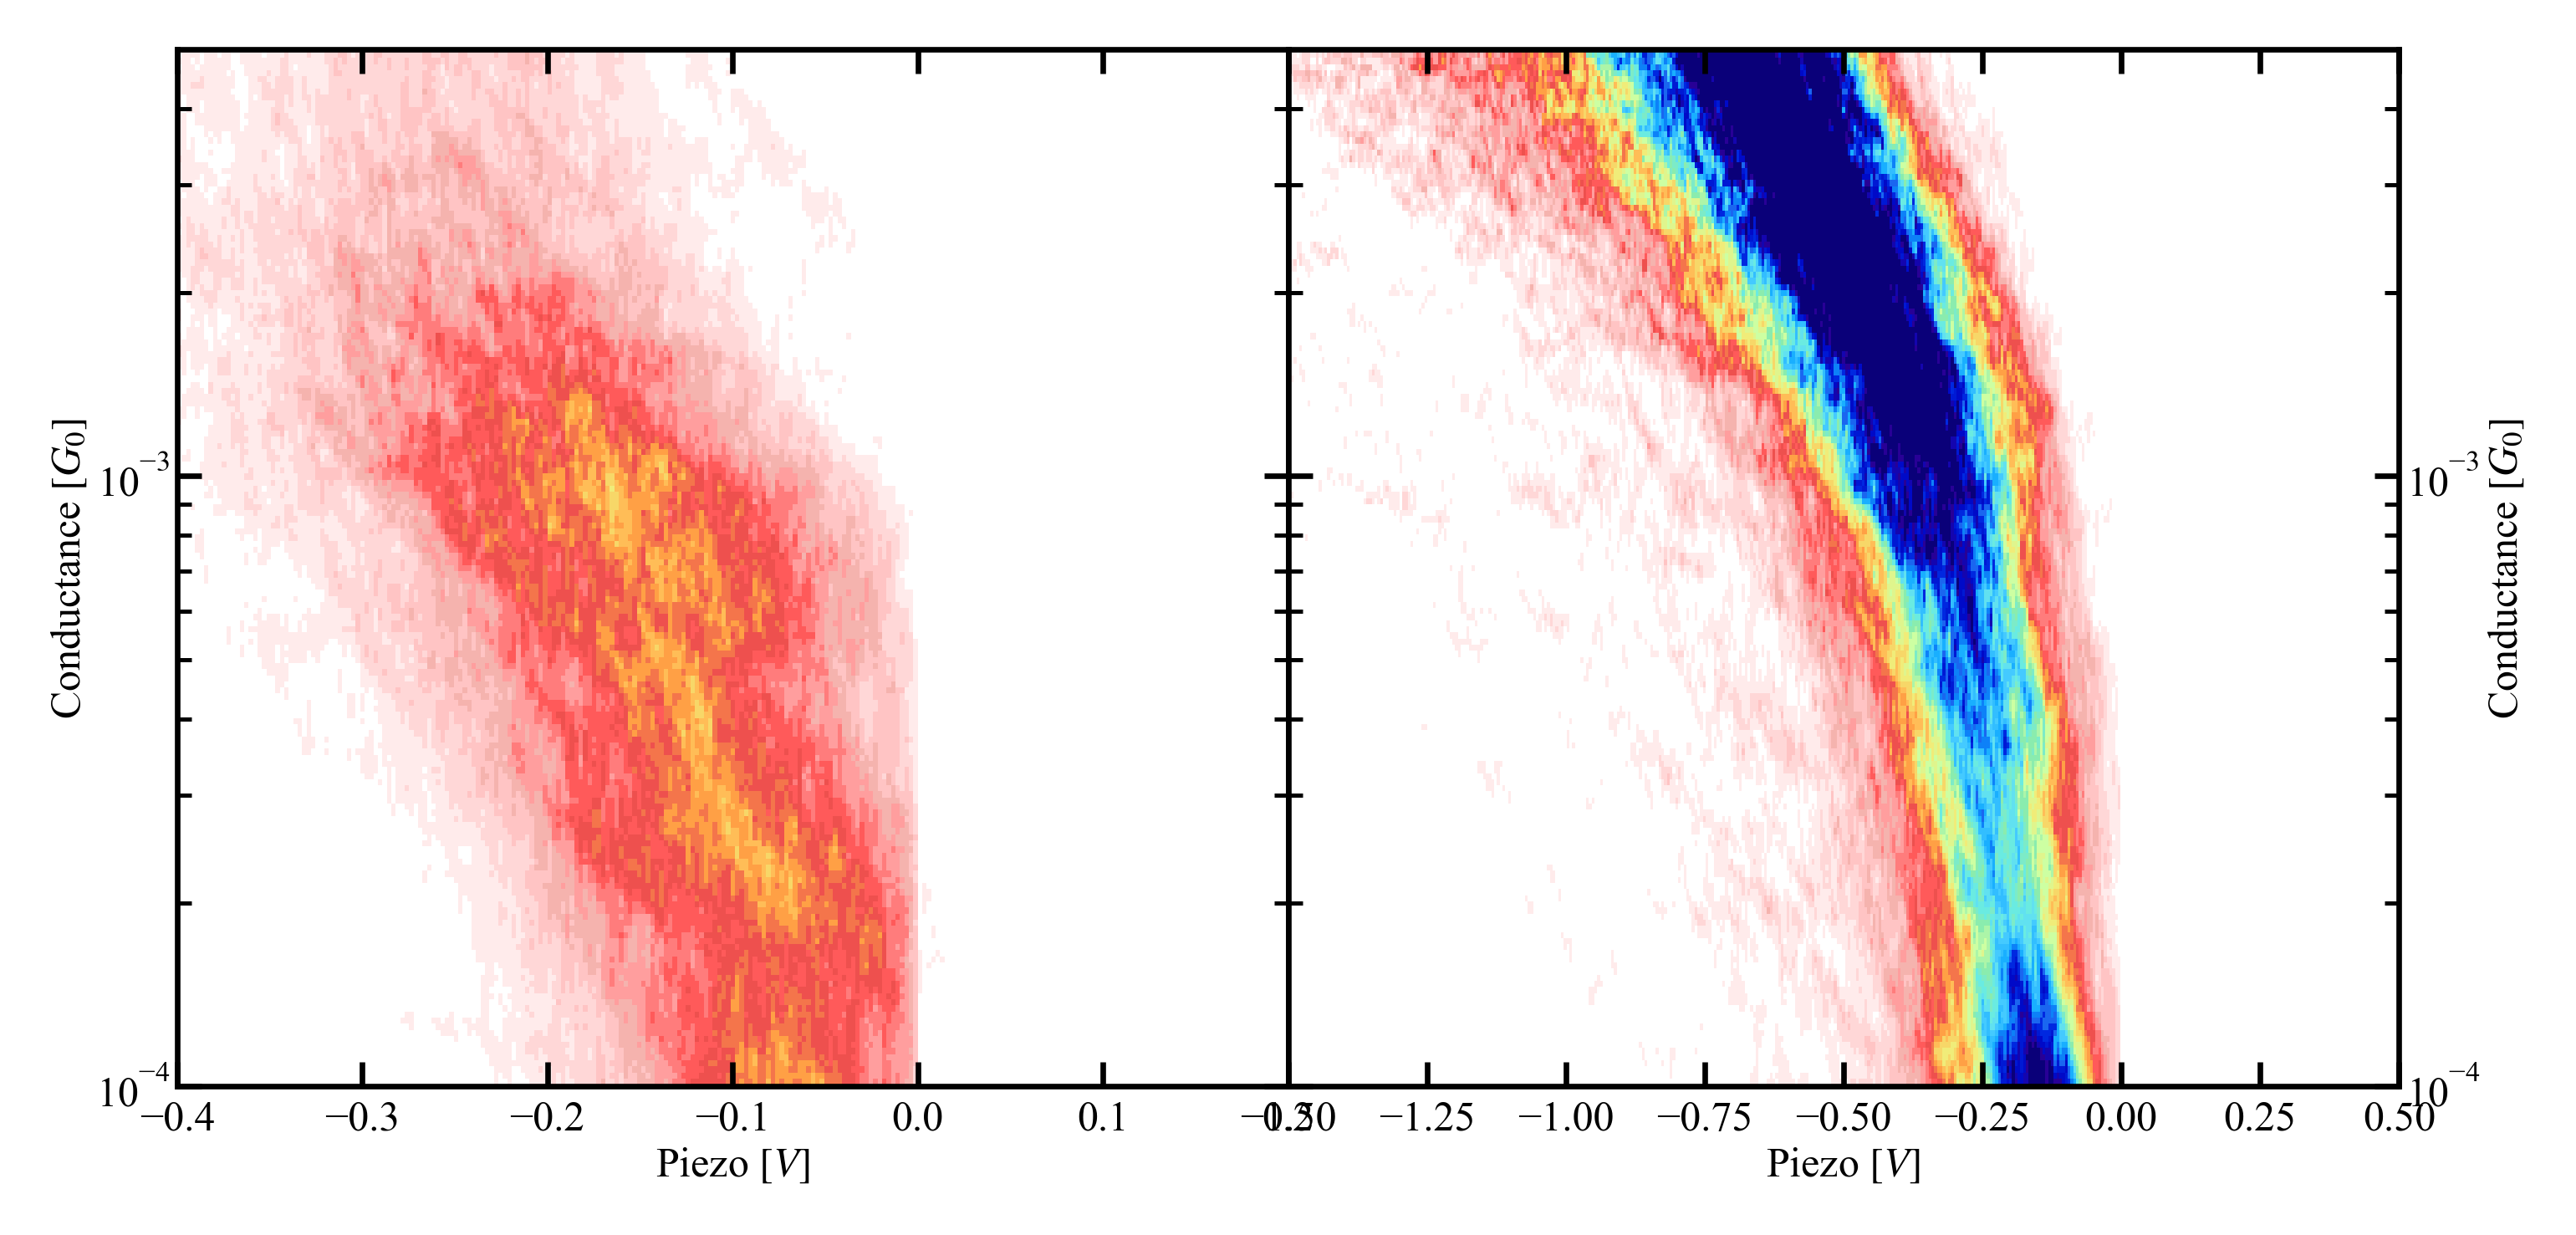

In [4]:
ax_pull, ax_push = hist_BPY.plot_hist_2d_both(vmax=5000)
ax_pull.set_ylim(1e-4, 5e-3)
ax_push.set_ylim(1e-4, 5e-3)

## Filter traces

based on the number of points in the LowG region (pull: 

In [5]:
pull_filt, push_filt = filter_traces.filter_bj(folder=home_folder,
                                               filter_condition=filter_traces.check_plateau_length,
                                               start_trace=1202, end_trace=2200,
                                               min_length=7500,
                                               low_bound_pull=1.5e-4,
                                               high_bound_pull=4e-4,
                                               low_bound_push=2e-4,
                                               high_bound_push=1e-3)

In [6]:
print(f'Pull: {len(pull_filt)}')
print(f'Push: {len(push_filt)}')
print(f'Both: {len(np.intersect1d(pull_filt, push_filt))}')

Pull: 239
Push: 816
Both: 198


In [7]:
hist_filt = Histogram(home_folder, traces=pull_filt)
hist_filt.calc_hist_2d(align_at=1e-1, range_pull=(-0.2, 0.7), range_push=(-0.5, 2),
                       xbins_pull=200, xbins_push=250, interpolate=True)

  0%|          | 0/239 [00:00<?, ?it/s]

2D histogram pull direction created from 239 traces
2D histogram push direction created from 239 traces


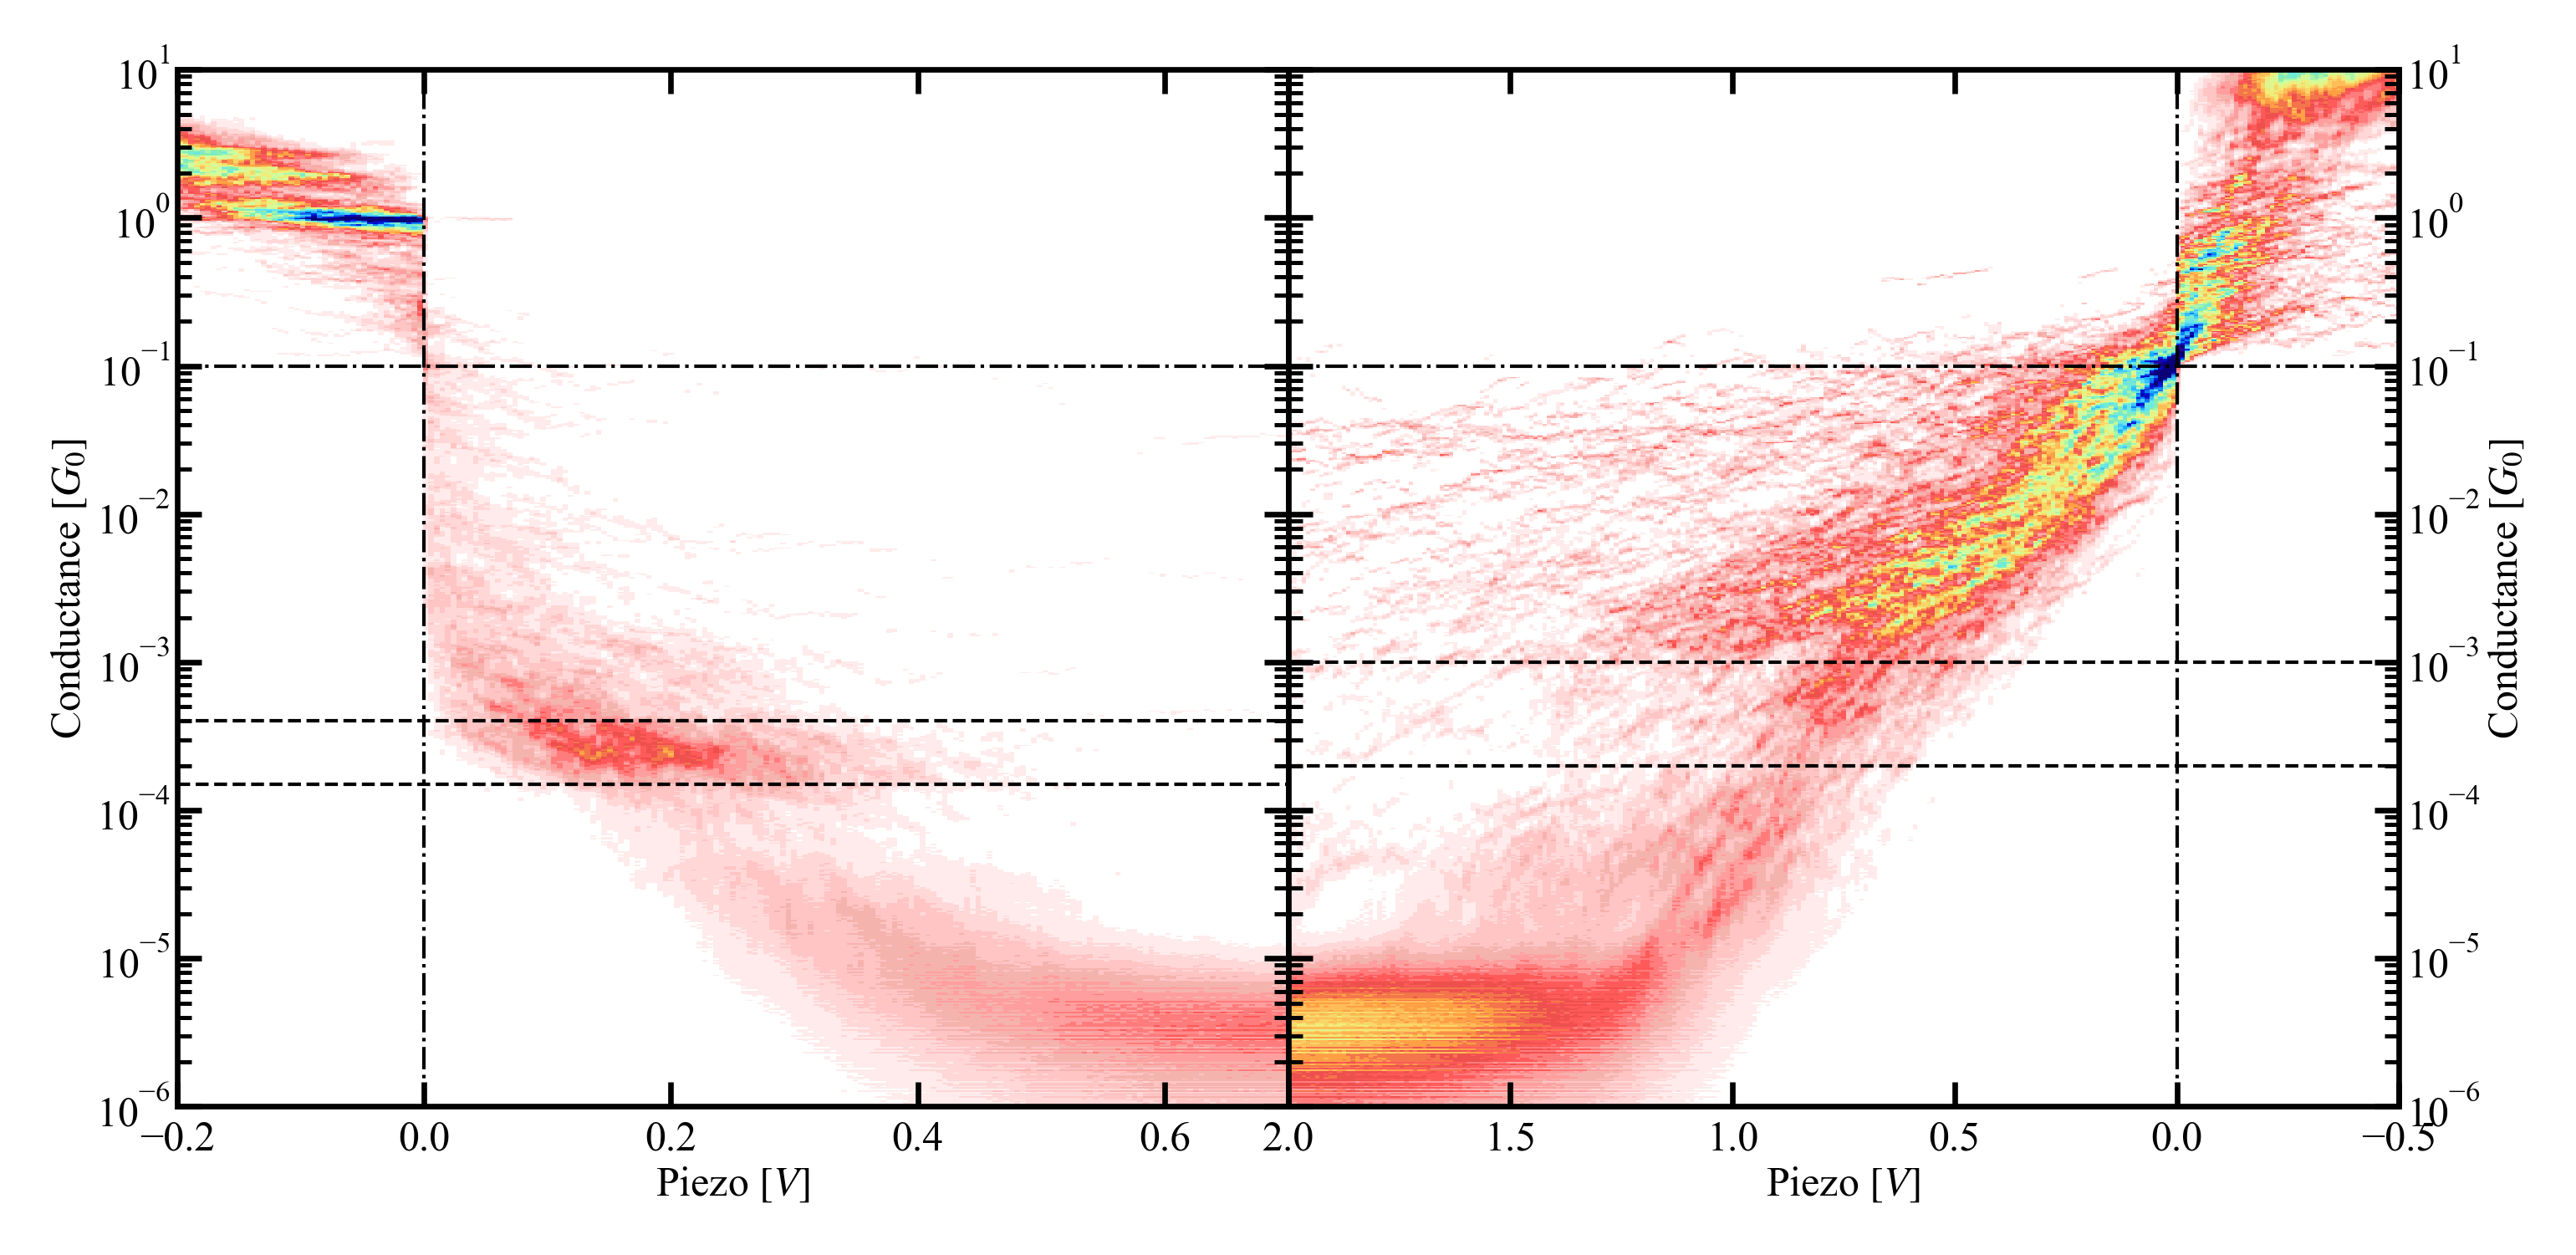

In [8]:
ax_pull, ax_push = hist_filt.plot_hist_2d_both(vmax=5e3)
ax_push.set_xlim(ax_push.get_xlim()[::-1])
ax_pull.axvline(0, ls='-.', lw=0.5, c='k')
ax_push.axvline(0, ls='-.', lw=0.5, c='k')
ax_pull.axhline(hist_filt.align_at, ls='-.', lw=0.5, c='k')
ax_push.axhline(hist_filt.align_at, ls='-.', lw=0.5, c='k')

ax_pull.axhline(1.5e-4, ls='--', lw=0.5, c='k')
ax_pull.axhline(4e-4, ls='--', lw=0.5, c='k')
ax_push.axhline(2e-4, ls='--', lw=0.5, c='k')
ax_push.axhline(1e-3, ls='--', lw=0.5, c='k')

# Temporal noise

In [ ]:
def temporal_noise_exponent(traces, direction='pull', align_at=1e-1,
                            win_size=1024, step_size=None, width=61_440, piez_range=0,
                            freq_range=(2000, 5000)):
    """
    freq_range: frequency range for area calculation in Hz, default: (2000, 5000)
    win_size: window size, default: 1024
    step_size: step size, default: win_size//2
    width
    """
    
    if step_size is None:
        step_size = win_size//2
    
    noise_power_all = []
    cond_avg_all = []

    for trace in tqdm(traces, desc='Processing traces'):
        noise_power_single_trace = []

        trace_pair = TracePair(trace, load_from=home_folder)
        trace_pair.align_trace(align_at=align_at, interpolate=True)
#         trace_pair.temporal_noise(align_at=1e-1, interpolate=True, mode='positive',
#                                   win_size=win_size, step_size=win_size//2, width=61440)
        if direction == 'pull':
            aligned_piezo= trace_pair.aligned_piezo_pull
            conductance = trace_pair.conductance_pull
        elif direction == 'push':
            aligned_piezo = trace_pair.aligned_piezo_push
            conductance = trace_pair.conductance_push
        else:
            raise ValueError(f'Unknown value {direction} for variable `direction`. Valid values: "pull", "push".')
        
    #     for i in range(trace_pair.Zxx_pull.shape[1]):
    #         psd = np.abs(trace_pair.Zxx_pull[:, i])
    #         noise_power_single_trace.append(scipy.integrate.trapz(psd[mask], x=trace_pair.f_pull[mask]))
        
        if isinstance(piez_range, int):
            piez_mask = aligned_piezo >= piez_range
        elif isinstance(piez_range, tuple):
            piez_mask = np.bitwise_and(aligned_piezo >= piez_range[0], aligned_piezo <= piez_range[1])
        
        mirr_ext_plat_cond = utils.even_ext(conductance[piez_mask][:width],
                                            n=win_size//2)
        
        psd_intervals = np.array([mirr_ext_plat_cond[i*step_size: i*step_size+win_size]
                              for i in range(len(mirr_ext_plat_cond)//step_size-1)])
        cond_avg = utils.log_avg(psd_intervals, axis=1)
        
        mirr_ext_plat_piez = utils.even_ext(aligned_piezo[piez_mask][:width],
                                            n=win_size//2)
        piezo_intervals = np.array([mirr_ext_plat_piez[i*step_size: i*step_size+win_size]
                              for i in range(len(mirr_ext_plat_piez)//step_size-1)])
        piez_avg = utils.log_avg(piezo_intervals, axis=1)
        
        freqs, psds = scipy.signal.periodogram(psd_intervals, fs=trace_pair.sample_rate, window='hann', detrend=False,
                                               scaling='density', axis=1)
        freq_mask = np.bitwise_and(freqs > freq_range[0], freqs < freq_range[1])
        
        for psd in psds:
            noise_power_single_trace.append(scipy.integrate.trapz(psd[freq_mask], x=freqs[freq_mask]))

        cond_avg_all.append(cond_avg)
        noise_power_all.append(noise_power_single_trace)

    noise_power_all = np.array(noise_power_all)
    cond_avg_all = np.array(cond_avg_all)
    
    N = np.linspace(0, 2.2, num=1000)
    exponents = np.zeros(noise_power_all.shape[1])        

    for interval in tqdm(range(noise_power_all.shape[1]), desc='Calculating exponents'):
        corr = np.zeros_like(N)
        for i, n in enumerate(N):
            corr[i] = utils.calc_correlation(np.log10(noise_power_all[:, interval]/cond_avg_all[:, interval]**n),
                                             np.log10(cond_avg_all[:, interval]))

        exponents[interval] = N[abs(corr) == min(abs(corr))][0]
        
    return piez_avg, exponents, noise_power_all, cond_avg_all

In [ ]:
piez_avg, exponents, noise_power_all, cond_avg_all = temporal_noise_exponent(pull_filt, direction='pull', align_at=1e-1,
                                                                             win_size=1024, step_size=None, width=70144,
                                                                             piez_range=0,
                                                                             freq_range=(2000, 5000))

In [ ]:
ax_pull = hist_filt.plot_hist_2d_one(direction='pull', vmax=5e3)
ax_pull.axvline(0, ls='-.', lw=0.5, c='k')
ax_pull.axhline(hist_filt.align_at, ls='-.', lw=0.5, c='k')
ax_pull.axhline(1.5e-4, ls='--', lw=0.5, c='k')
ax_pull.axhline(4e-4, ls='--', lw=0.5, c='k')

exp_ax = ax_pull.twinx()
exp_ax.plot(piez_avg, exponents, c='blue', lw='0.5')
# exp_ax.spines.right.set_position(("axes", 1.1))
exp_ax.set_ylabel('Exponent')
exp_ax.set_ylim(0.8, 2.2)

In [ ]:
piez_avg, exponents, noise_power_all, cond_avg_all = temporal_noise_exponent(pull_filt, direction='pull', align_at=1e-4,
                                                                             win_size=1024, step_size=None, width=70144,
                                                                             piez_range=(),
                                                                             freq_range=(2000, 5000))

In [ ]:
ax_pull = hist_filt.plot_hist_2d_one(direction='pull', vmax=5e3)
ax_pull.axvline(0, ls='-.', lw=0.5, c='k')
ax_pull.axhline(hist_filt.align_at, ls='-.', lw=0.5, c='k')
ax_pull.axhline(1.5e-4, ls='--', lw=0.5, c='k')
ax_pull.axhline(4e-4, ls='--', lw=0.5, c='k')

exp_ax = ax_pull.twinx()
exp_ax.plot(piez_avg, exponents, c='blue', lw='0.5')
# exp_ax.spines.right.set_position(("axes", 1.1))
exp_ax.set_ylabel('Exponent')
exp_ax.set_ylim(0.8, 2.2)

In [ ]:
trace_pair.Zxx_pull.shape[1]

In [ ]:
trace_pair = TracePair(1202, load_from=home_folder)
trace_pair.temporal_noise(align_at=1e-1, interpolate=True, mode='positive',
                          win_size=1024, step_size=1024//2, width=49_665)

In [ ]:
print(trace_pair.aligned_time_pull.shape)
print(trace_pair.t_pull.shape)

In [ ]:
ax_pull, ax_push = trace_pair.plot_temporal_noise(normalize=True,
                                                  piezo_range_pull=(-0.5, 0.5), vmax_pull=0.1,
                                                  piezo_range_push=(1.5, -0.5), vmax_push=50)

In [ ]:
freq_range = (2000, 5000)  # frequency range for area calculation in Hz

noise_power_all = []
cond_avg_all = []

win_size = 1024
step_size = win_size//2

for trace in tqdm(pull_filt):
    noise_power_single_trace = []
    
    trace_pair = TracePair(trace, load_from=home_folder)
    trace_pair.temporal_noise(align_at=1e-1, interpolate=True, mode='positive',
                              win_size=win_size, step_size=win_size//2, width=61440)
    
    
    mask = np.bitwise_and(trace_pair.f_pull > freq_range[0], trace_pair.f_pull < freq_range[1])
#     for i in range(trace_pair.Zxx_pull.shape[1]):
#         psd = np.abs(trace_pair.Zxx_pull[:, i])
#         noise_power_single_trace.append(scipy.integrate.trapz(psd[mask], x=trace_pair.f_pull[mask]))
    
    mirr_ext_plat_cond = utils.even_ext(trace_pair.conductance_pull[trace_pair.aligned_piezo_pull >=0][:61440],
                                        n=win_size//2)
    psd_intervals = np.array([mirr_ext_plat_cond[i*step_size: i*step_size+win_size]
                          for i in range(len(mirr_ext_plat_cond)//step_size-1)])
    cond_avg = utils.log_avg(psd_intervals, axis=1)
    
    freqs, psds = scipy.signal.periodogram(psd_intervals, fs=trace_pair.sample_rate, window='hann', detrend=False,
                                 scaling='density', axis=1)
    
    for psd in psds:
        noise_power_single_trace.append(scipy.integrate.trapz(psd[mask], x=freqs[mask]))
        
    cond_avg_all.append(cond_avg)
    noise_power_all.append(noise_power_single_trace)
    
noise_power_all = np.array(noise_power_all)
cond_avg_all = np.array(cond_avg_all)

In [ ]:
# trace_pair = TracePair(1202, load_from=home_folder)
# trace_pair.align_trace(align_at=1e-1)

# mirr_ext_plat_cond = utils.even_ext(trace_pair.conductance_pull[trace_pair.aligned_piezo_pull >=0][:61440],
#                                     n=win_size//2)
# psd_intervals = np.array([mirr_ext_plat_cond[i*step_size: i*step_size+win_size]
#                           for i in range(len(mirr_ext_plat_cond)//step_size-1)])
# cond_avg = utils.log_avg(psd_intervals, axis=1)

In [ ]:
# psd_intervals.shape
# cond_avg.shape

In [ ]:
print(noise_power_all.shape)
print(cond_avg_all.shape)

In [ ]:
N = np.linspace(0, 4, num=1000)
n_pull= np.zeros(trace_pair.Zxx_pull.shape[1])        

for interval in tqdm(range(trace_pair.Zxx_pull.shape[1])):
    pull_corr = np.zeros_like(N)
    for i, n in enumerate(N):
        pull_corr[i] = utils.calc_correlation(np.log10(noise_power_all[:, interval]/cond_avg_all[:, interval]**n),
                                              np.log10(cond_avg_all[:, interval]))

    n_pull[interval] = N[abs(pull_corr) == min(abs(pull_corr))][0]

In [ ]:
n_pull.shape

In [ ]:
trace_pair.t_pull

In [ ]:
ax_pull = hist_filt.plot_hist_2d_one(direction='pull', vmax=5e3)
ax_pull.axvline(0, ls='-.', lw=0.5, c='k')
ax_pull.axhline(hist_filt.align_at, ls='-.', lw=0.5, c='k')
ax_pull.axhline(1.5e-4, ls='--', lw=0.5, c='k')
ax_pull.axhline(4e-4, ls='--', lw=0.5, c='k')

exp_ax = ax_pull.twinx()
exp_ax.plot(trace_pair.t_pull*trace_pair.rate, n_pull, c='blue', lw='0.5')
# exp_ax.spines.right.set_position(("axes", 1.1))
exp_ax.set_ylabel('Exponent')
exp_ax.set_ylim(1, 2)

In [ ]:
ax_pull, ax_push = trace_pair.plot_temporal_noise(normalize=True,
                                                  piezo_range_pull=(-0.5, 0.5), vmax_pull=0.05,
                                                  piezo_range_push=(1.5, -0.5), vmax_push=50)
exp_ax = ax_pull.twinx()
exp_ax.plot(trace_pair.t_pull, n_pull, c='blue')
exp_ax.spines.right.set_position(("axes", 1.1))
exp_ax.set_ylabel('Exponent')

In [ ]:
piez_avg, exponents, noise_power_all, cond_avg_all = temporal_noise_exponent(pull_filt, direction='pull', align_at=1e-4,
                                                                             win_size=1024, step_size=None, width=70144,
                                                                             piez_range=(),
                                                                             freq_range=(2000, 5000))

(0.8, 2.2)

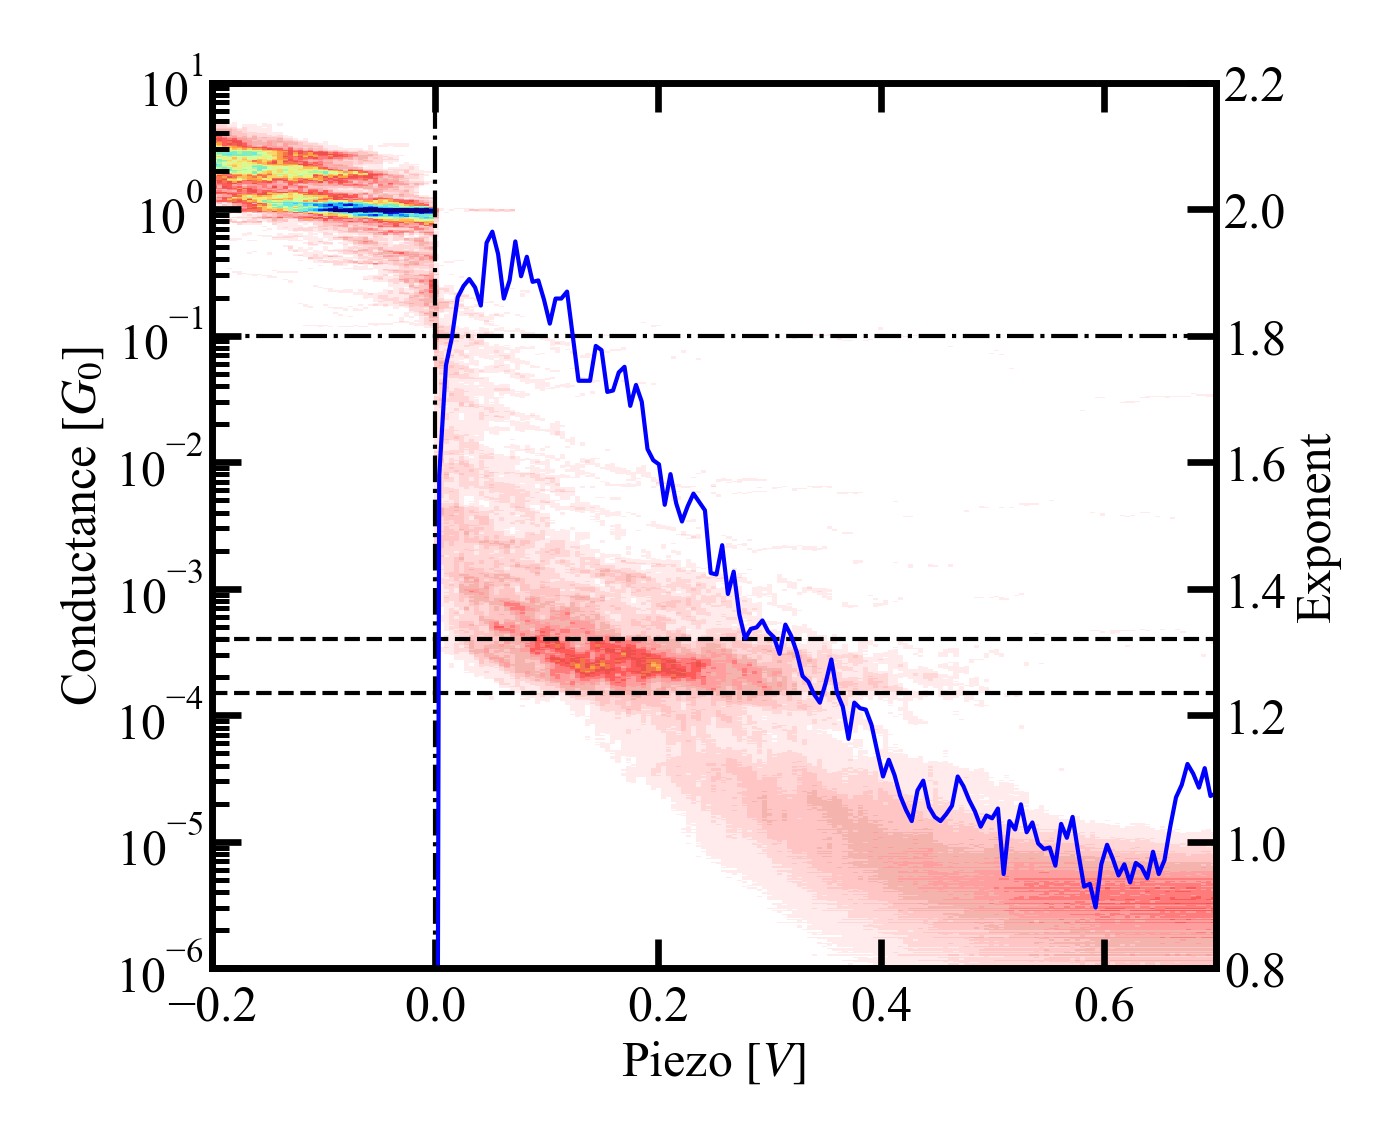

In [113]:
ax_pull = hist_filt.plot_hist_2d_one(direction='pull', vmax=5e3)
ax_pull.axvline(0, ls='-.', lw=0.5, c='k')
ax_pull.axhline(hist_filt.align_at, ls='-.', lw=0.5, c='k')
ax_pull.axhline(1.5e-4, ls='--', lw=0.5, c='k')
ax_pull.axhline(4e-4, ls='--', lw=0.5, c='k')

exp_ax = ax_pull.twinx()
exp_ax.plot(piez_avg, exponents, c='blue', lw='0.5')
# exp_ax.spines.right.set_position(("axes", 1.1))
exp_ax.set_ylabel('Exponent')
exp_ax.set_ylim(0.8, 2.2)

In [99]:
trace_pair.Zxx_pull.shape[1]

121

In [9]:
trace_pair = TracePair(1202, load_from=home_folder)
trace_pair.temporal_noise(align_at=1e-1, interpolate=True, mode='positive',
                          win_size=1024, step_size=1024//2, width=49_665)

In [10]:
print(trace_pair.aligned_time_pull.shape)
print(trace_pair.t_pull.shape)

(334877,)
(99,)


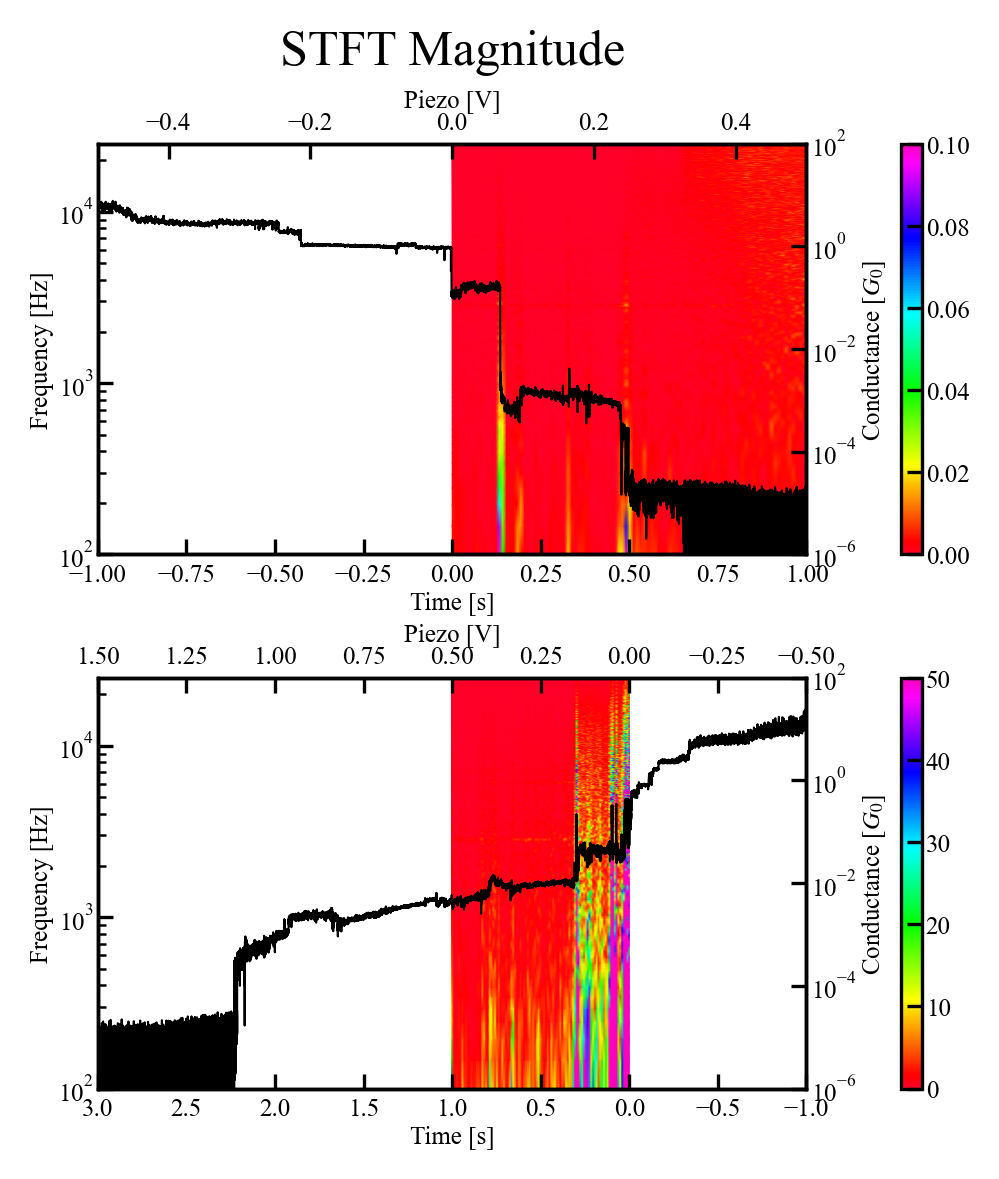

In [11]:
ax_pull, ax_push = trace_pair.plot_temporal_noise(normalize=True,
                                                  piezo_range_pull=(-0.5, 0.5), vmax_pull=0.1,
                                                  piezo_range_push=(1.5, -0.5), vmax_push=50)

In [95]:
freq_range = (2000, 5000)  # frequency range for area calculation in Hz

noise_power_all = []
cond_avg_all = []

win_size = 1024
step_size = win_size//2

for trace in tqdm(pull_filt):
    noise_power_single_trace = []
    
    trace_pair = TracePair(trace, load_from=home_folder)
    trace_pair.temporal_noise(align_at=1e-1, interpolate=True, mode='positive',
                              win_size=win_size, step_size=win_size//2, width=61440)
    
    
    mask = np.bitwise_and(trace_pair.f_pull > freq_range[0], trace_pair.f_pull < freq_range[1])
#     for i in range(trace_pair.Zxx_pull.shape[1]):
#         psd = np.abs(trace_pair.Zxx_pull[:, i])
#         noise_power_single_trace.append(scipy.integrate.trapz(psd[mask], x=trace_pair.f_pull[mask]))
    
    mirr_ext_plat_cond = utils.even_ext(trace_pair.conductance_pull[trace_pair.aligned_piezo_pull >=0][:61440],
                                        n=win_size//2)
    psd_intervals = np.array([mirr_ext_plat_cond[i*step_size: i*step_size+win_size]
                          for i in range(len(mirr_ext_plat_cond)//step_size-1)])
    cond_avg = utils.log_avg(psd_intervals, axis=1)
    
    freqs, psds = scipy.signal.periodogram(psd_intervals, fs=trace_pair.sample_rate, window='hann', detrend=False,
                                 scaling='density', axis=1)
    
    for psd in psds:
        noise_power_single_trace.append(scipy.integrate.trapz(psd[mask], x=freqs[mask]))
        
    cond_avg_all.append(cond_avg)
    noise_power_all.append(noise_power_single_trace)
    
noise_power_all = np.array(noise_power_all)
cond_avg_all = np.array(cond_avg_all)

  0%|          | 0/239 [00:00<?, ?it/s]

In [86]:
# trace_pair = TracePair(1202, load_from=home_folder)
# trace_pair.align_trace(align_at=1e-1)

# mirr_ext_plat_cond = utils.even_ext(trace_pair.conductance_pull[trace_pair.aligned_piezo_pull >=0][:61440],
#                                     n=win_size//2)
# psd_intervals = np.array([mirr_ext_plat_cond[i*step_size: i*step_size+win_size]
#                           for i in range(len(mirr_ext_plat_cond)//step_size-1)])
# cond_avg = utils.log_avg(psd_intervals, axis=1)

In [87]:
# psd_intervals.shape
# cond_avg.shape

(121,)

In [96]:
print(noise_power_all.shape)
print(cond_avg_all.shape)

(239, 121)
(239, 121)


In [97]:
N = np.linspace(0, 4, num=1000)
n_pull= np.zeros(trace_pair.Zxx_pull.shape[1])        

for interval in tqdm(range(trace_pair.Zxx_pull.shape[1])):
    pull_corr = np.zeros_like(N)
    for i, n in enumerate(N):
        pull_corr[i] = utils.calc_correlation(np.log10(noise_power_all[:, interval]/cond_avg_all[:, interval]**n),
                                              np.log10(cond_avg_all[:, interval]))

    n_pull[interval] = N[abs(pull_corr) == min(abs(pull_corr))][0]

  0%|          | 0/121 [00:00<?, ?it/s]

In [98]:
n_pull.shape

(121,)

In [92]:
trace_pair.t_pull

array([0.     , 0.01024, 0.02048, 0.03072, 0.04096, 0.0512 , 0.06144,
       0.07168, 0.08192, 0.09216, 0.1024 , 0.11264, 0.12288, 0.13312,
       0.14336, 0.1536 , 0.16384, 0.17408, 0.18432, 0.19456, 0.2048 ,
       0.21504, 0.22528, 0.23552, 0.24576, 0.256  , 0.26624, 0.27648,
       0.28672, 0.29696, 0.3072 , 0.31744, 0.32768, 0.33792, 0.34816,
       0.3584 , 0.36864, 0.37888, 0.38912, 0.39936, 0.4096 , 0.41984,
       0.43008, 0.44032, 0.45056, 0.4608 , 0.47104, 0.48128, 0.49152,
       0.50176, 0.512  , 0.52224, 0.53248, 0.54272, 0.55296, 0.5632 ,
       0.57344, 0.58368, 0.59392, 0.60416, 0.6144 , 0.62464, 0.63488,
       0.64512, 0.65536, 0.6656 , 0.67584, 0.68608, 0.69632, 0.70656,
       0.7168 , 0.72704, 0.73728, 0.74752, 0.75776, 0.768  , 0.77824,
       0.78848, 0.79872, 0.80896, 0.8192 , 0.82944, 0.83968, 0.84992,
       0.86016, 0.8704 , 0.88064, 0.89088, 0.90112, 0.91136, 0.9216 ,
       0.93184, 0.94208, 0.95232, 0.96256, 0.9728 , 0.98304, 0.99328,
       1.00352, 1.01

(1.0, 2.0)

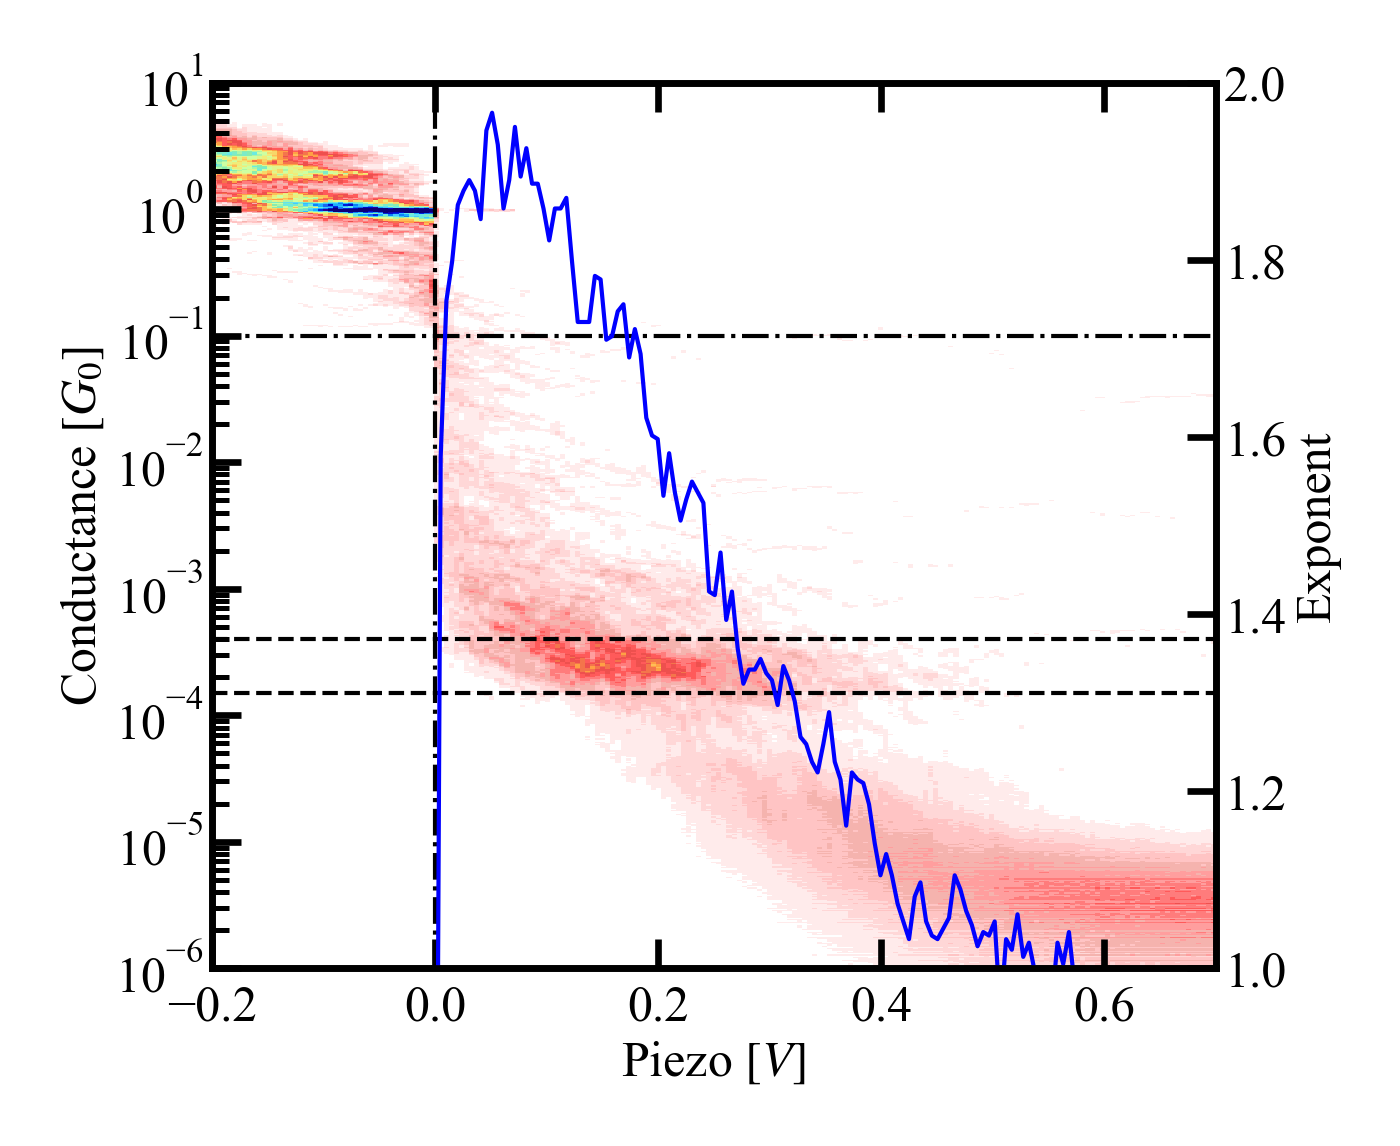

In [94]:
ax_pull = hist_filt.plot_hist_2d_one(direction='pull', vmax=5e3)
ax_pull.axvline(0, ls='-.', lw=0.5, c='k')
ax_pull.axhline(hist_filt.align_at, ls='-.', lw=0.5, c='k')
ax_pull.axhline(1.5e-4, ls='--', lw=0.5, c='k')
ax_pull.axhline(4e-4, ls='--', lw=0.5, c='k')

exp_ax = ax_pull.twinx()
exp_ax.plot(trace_pair.t_pull*trace_pair.rate, n_pull, c='blue', lw='0.5')
# exp_ax.spines.right.set_position(("axes", 1.1))
exp_ax.set_ylabel('Exponent')
exp_ax.set_ylim(1, 2)

Text(0, 0.5, 'Exponent')

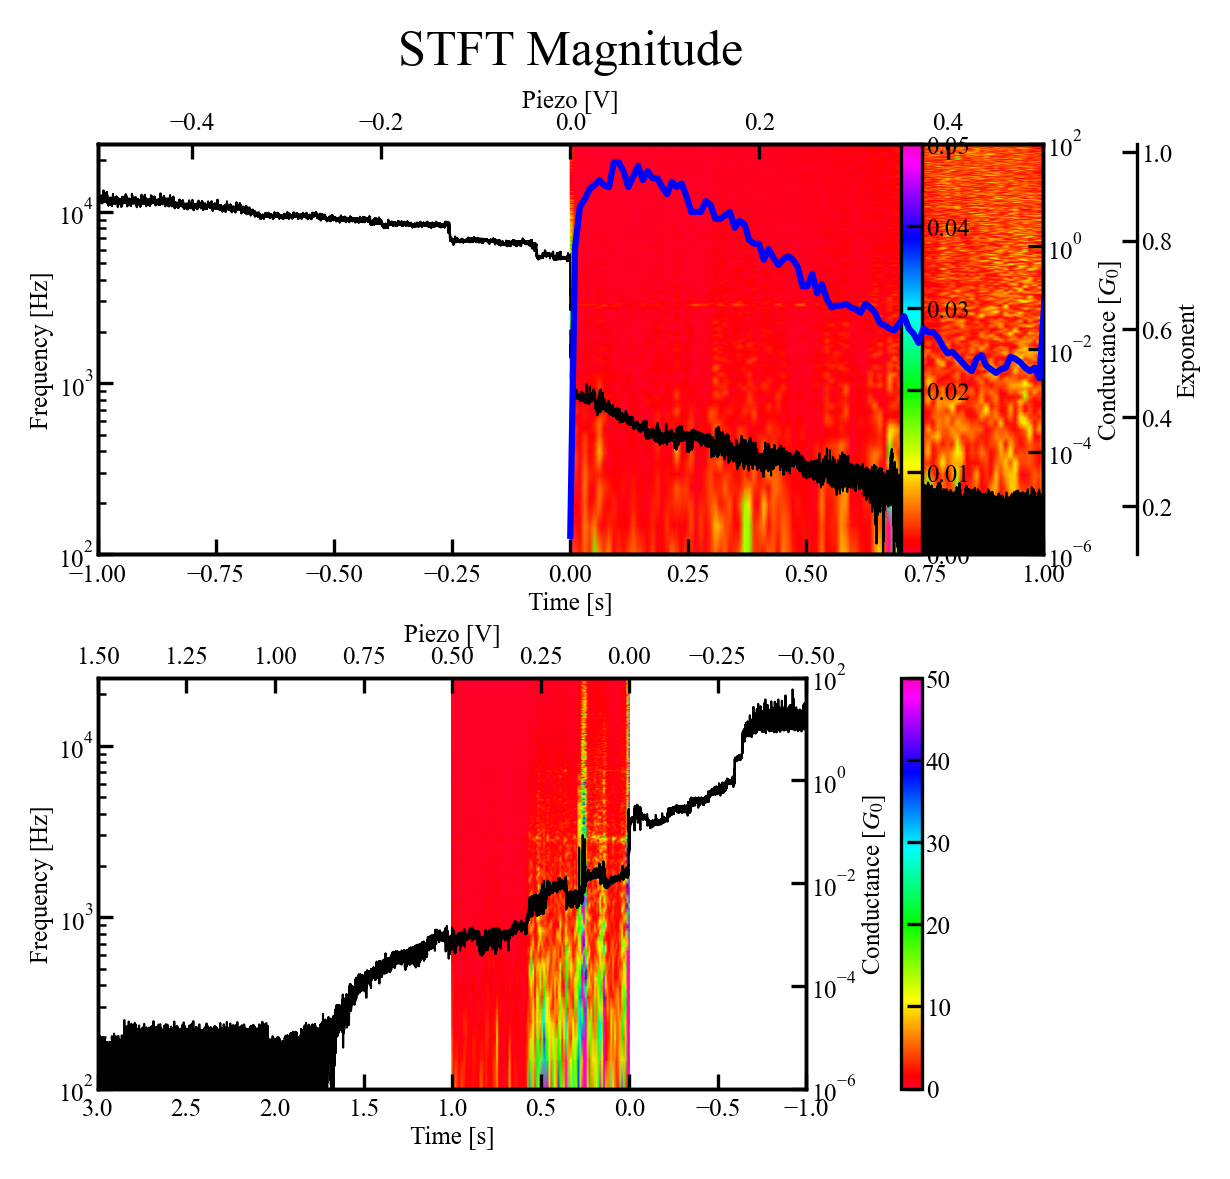

In [55]:
ax_pull, ax_push = trace_pair.plot_temporal_noise(normalize=True,
                                                  piezo_range_pull=(-0.5, 0.5), vmax_pull=0.05,
                                                  piezo_range_push=(1.5, -0.5), vmax_push=50)
exp_ax = ax_pull.twinx()
exp_ax.plot(trace_pair.t_pull, n_pull, c='blue')
exp_ax.spines.right.set_position(("axes", 1.1))
exp_ax.set_ylabel('Exponent')

In [70]:
def temporal_noise(folder: Path,
                   direction: str = 'pull',
                   align_at: float = 1e-5,
                   traces: Optional[Union[np.array, List[int]]] = None,
                   strat_trace: Optional[int] = 1,
                   end_trace: Optional[int] = None,
                   win_size: int = 1024,
                   step_size: Optional[int] = None,
                   width: int = 70_000,
                   freq_range: Tuple[float, float] = (2000, 5000),
                   N: np.array = np.linspace(0, 4, num=1000)):
    
    if step_size is None:
        step_size = win_size // 2
    
    if traces is None:
        traces = np.arange(start_trace, end_trace+1)
    
    for trace in tqdm(traces):
        # load trace
        trace_pair = TracePair(trace, load_from=home_folder)
        # to study temporal noise of pull traces, we align them at 1e-1 G0
        try:
            trace_pair.align_trace(align_at=align_at)
        except IndexError:
            # trace did not cross align value
            warnings.warn(f'Trace {trace} did not cross align value, skipping trace.')
            continue
            
        if direction == 'pull':
            piezo = trace_pair.aligned_piezo_pull
            conductance = trace_pair.conductance_pull
        elif direction == 'push':
            piezo = trace_pair.aligned_piezo_push
            conductance = trace_pair.conductance_push
        else:
            raise ValueError('Wrong direction parameter {direction}. Valid parameters: "pull" or "push".')

        cut_part = piezo[piezo > 0][:width]

        piezo_points =  utils.mov_avg(cut_part,
                                      win_size=win_size, step_size=step_size,
                                      avg_type=np.mean)

        cut_part = conductance[piezo > 0][:width]
        
#         print(range(len(cut_part)//step_size))
        
        if len(cut_part) < width:
            warnings.warn(f'Trace {trace} was not long enough, skipping trace.')
            continue

        cond_avg_temp = utils.mov_avg(cut_part,
                                      win_size=win_size, step_size=step_size,
                                      avg_type=utils.log_avg)    

        mirr_ext_plat_cond = utils.even_ext(cut_part, n=win_size//2)

        psd_intervals = np.array([np.array(mirr_ext_plat_cond[i*step_size: i*step_size+win_size])
                                  for i in range(len(mirr_ext_plat_cond)//step_size)])
        
#         print(psd_intervals)
        
        
        f, psds = scipy.signal.welch(x=psd_interval, fs=trace_pair.sample_rate, window='hann',
                                     nperseg=win_size, noverlap=step_size, nfft=None,
                                     detrend=False, scaling='density', average='mean', axis=1)
            
        print(f'psd_intervals: {psd_intervals.shape}')
        print(f'psds: {psds.shape}')
        print(f'f: {f.shape}')
        
        mask = np.bitwise_and(f > freq_range[0], f < freq_range[1])

        temp_arr = np.array([])

        for psd in psds:
            print(f'psd: {psd.shape}')
            print(psd)
            temp_arr = np.append(temp_arr, scipy.integrate.trapz(psd[mask], x=f[mask]))

        if any(np.isnan(temp_arr)):
            warnings.warn(f'Trace {trace} has NaN in noise_power at index: {np.where(np.isnan(temp_arr))}.')
            continue
        else:
            
            if 'noise_power' in locals() and 'cond_avg' in locals():
                noise_power = np.append(noise_power, temp_arr.reshape((1, -1)), axis=0)
                cond_avg = np.append(cond_avg, cond_avg_temp.reshape((1, -1)), axis=0)
            else:
                noise_power = temp_arr.reshape((1, -1))
                cond_avg = cond_avg_temp.reshape((1, -1))
                
    exponent = np.zeros(noise_power.shape[1])        

    for interval in tqdm(range(noise_power.shape[1])):
        corr = np.zeros_like(N)
        for i, n in enumerate(N):
            corr[i] = utils.calc_correlation(np.log10(noise_power[:, interval]/cond_avg[:, interval]**n),
                                             np.log10(cond_avg[:, interval]))

        exponent[interval] = N[abs(corr) == min(abs(corr))][0]
        
    return noise_power, cond_avg, piezo_points, exponent

In [2]:
trace_pair = TracePair(1202, load_from=home_folder)
# to study temporal noise of pull traces, we align them at 1e-1 G0
trace_pair.align_trace(align_at=1e-1)
piezo = trace_pair.aligned_piezo_pull
conductance = trace_pair.conductance_pull

win_size=1024
step_size=win_size//2
width=49_665
freq_range=(2000, 5000)

conductance_cut = conductance[piezo >= 0][:width]

mirr_ext_plat_cond = utils.even_ext(conductance_cut, n=win_size//2)

psd_intervals = np.array([np.array(mirr_ext_plat_cond[i*step_size: i*step_size+win_size])
                          for i in range(len(mirr_ext_plat_cond)//step_size-1)])

# psds = []

# for psd_interval in psd_intervals:
#     f, psd = scipy.signal.welch(x=psd_interval, fs=trace_pair.sample_rate, window='hann',
#                                 nperseg=64, noverlap=0, nfft=None,
#                                 detrend=False, scaling='density', average='mean', axis=1)
    
#     psds.append(psd)

f_pull, t_pull, Zxx_pull = scipy.signal.stft(conductance_cut,
                                             fs=trace_pair.sample_rate,
                                             window='hann', nperseg=win_size,
                                             noverlap=win_size - step_size,
                                             nfft=None, detrend=False, return_onesided=True,
                                             boundary='even', padded=True, axis=- 1, scaling='psd')

cond_avg_temp = utils.log_avg(psd_intervals, axis=1)

interval_ranges = np.array([[i*step_size, i*step_size+win_size]
                             for i in range(len(mirr_ext_plat_cond)//step_size-1)])

piezo_cut = piezo[piezo > 0][:width]
print(piezo_cut.shape)

piezo_points =  piezo_cut[np.mean(interval_ranges, axis=1, dtype=int) - step_size]

(49665,)


In [3]:
Zxx_pull.shape

(513, 99)

In [4]:
trace_pair = TracePair(1202, load_from=home_folder)
trace_pair.temporal_noise(align_at=1e-1, interpolate=True, mode='positive',
                          win_size=1024, step_size=win_size//2, width=49_665)

In [5]:
trace_pair.Zxx_pull.shape

(513, 99)

In [8]:
trace_pair.cond_avg_pull.shape

(99,)

In [17]:
np.array(psds).shape

(98, 16)

In [9]:
psd_intervals.shape

(98, 1024)

In [98]:
trace_pair.dz_pull

-1.0058096249238527e-05

In [100]:
(trace_pair.piezo_pull[50_000]-trace_pair.piezo_pull[0])

0.502904812461928

In [101]:
piezo[piezo>0][:50_000]

array([6.22128318e-06, 1.62793794e-05, 2.63374757e-05, ...,
       5.02880859e-01, 5.02890918e-01, 5.02900976e-01])

In [102]:
piezo_points

array([6.22128318e-06, 5.15596656e-03, 1.03057118e-02, 1.54554571e-02,
       2.06052024e-02, 2.57549477e-02, 3.09046930e-02, 3.60544382e-02,
       4.12041835e-02, 4.63539288e-02, 5.15036741e-02, 5.66534194e-02,
       6.18031646e-02, 6.69529099e-02, 7.21026552e-02, 7.72524005e-02,
       8.24021458e-02, 8.75518910e-02, 9.27016363e-02, 9.78513816e-02,
       1.03001127e-01, 1.08150872e-01, 1.13300617e-01, 1.18450363e-01,
       1.23600108e-01, 1.28749853e-01, 1.33899599e-01, 1.39049344e-01,
       1.44199089e-01, 1.49348834e-01, 1.54498580e-01, 1.59648325e-01,
       1.64798070e-01, 1.69947816e-01, 1.75097561e-01, 1.80247306e-01,
       1.85397051e-01, 1.90546797e-01, 1.95696542e-01, 2.00846287e-01,
       2.05996032e-01, 2.11145778e-01, 2.16295523e-01, 2.21445268e-01,
       2.26595014e-01, 2.31744759e-01, 2.36894504e-01, 2.42044249e-01,
       2.47193995e-01, 2.52343740e-01, 2.57493485e-01, 2.62643231e-01,
       2.67792976e-01, 2.72942721e-01, 2.78092466e-01, 2.83242212e-01,
      

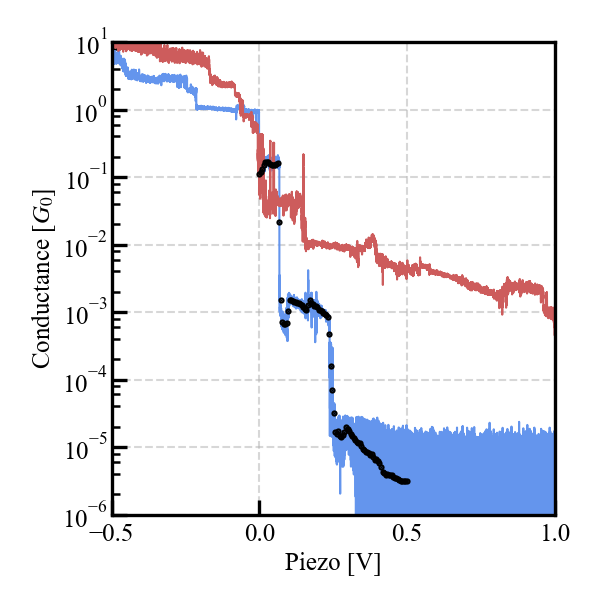

In [104]:
ax_trace = trace_pair.plot_trace_pair(dpi=300, aligned=True)
ax_trace.set_xlim(-0.5, 1)
ax_trace.plot(piezo_points, cond_avg_temp, 'o', markersize=0.5, c='k')

In [108]:
asd[:, 0]

array([    0,   512,  1024,  1536,  2048,  2560,  3072,  3584,  4096,
        4608,  5120,  5632,  6144,  6656,  7168,  7680,  8192,  8704,
        9216,  9728, 10240, 10752, 11264, 11776, 12288, 12800, 13312,
       13824, 14336, 14848, 15360, 15872, 16384, 16896, 17408, 17920,
       18432, 18944, 19456, 19968, 20480, 20992, 21504, 22016, 22528,
       23040, 23552, 24064, 24576, 25088, 25600, 26112, 26624, 27136,
       27648, 28160, 28672, 29184, 29696, 30208, 30720, 31232, 31744,
       32256, 32768, 33280, 33792, 34304, 34816, 35328, 35840, 36352,
       36864, 37376, 37888, 38400, 38912, 39424, 39936, 40448, 40960,
       41472, 41984, 42496, 43008, 43520, 44032, 44544, 45056, 45568,
       46080, 46592, 47104, 47616, 48128, 48640, 49152, 49664])

In [105]:
piezo.shape

(334877,)

In [106]:
np.mean(psd_intervals, axis=1).shape

(98,)

In [107]:
piezo_points.shape

(98,)

In [108]:
cond_avg_temp.shape

(98,)

In [109]:
pull_filt

array([1201, 1202, 1204, 1205, 1206, 1207, 1208, 1210, 1212, 1216, 1218,
       1222, 1223, 1225, 1231, 1233, 1234, 1235, 1238, 1240, 1241, 1242,
       1244, 1245, 1247, 1248, 1250, 1255, 1256, 1257, 1258, 1260, 1261,
       1262, 1263, 1265, 1266, 1267, 1271, 1275, 1279, 1280, 1282, 1283,
       1284, 1286, 1288, 1291, 1293, 1295, 1297, 1298, 1299, 1301, 1302,
       1305, 1307, 1308, 1310, 1312, 1316, 1317, 1318, 1319, 1320, 1321,
       1322, 1325, 1327, 1328, 1329, 1330, 1331, 1333, 1336, 1337, 1338,
       1340, 1343, 1344, 1346, 1347, 1349, 1350, 1351, 1352, 1353, 1354,
       1355, 1356, 1357, 1359, 1362, 1363, 1364, 1365, 1367, 1369, 1370,
       1371, 1372, 1373, 1374, 1376, 1377, 1378, 1380, 1381, 1386, 1388,
       1391, 1392, 1393, 1397, 1398, 1402, 1403, 1404, 1405, 1408, 1409,
       1410, 1412, 1413, 1414, 1415, 1417, 1418, 1419, 1420, 1421, 1422,
       1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1432, 1433, 1434,
       1435, 1437, 1438, 1439, 1441, 1442, 1444, 14

In [7]:
noise_power_pull, cond_avg_pull, piezo_points_pull, exponent_pull = \
    temporal_noise(folder=home_folder,
                   direction='pull',
                   align_at=1e-1,
                   traces=pull_filt,
                   win_size=1024,
                   step_size=None,
                   width=50_000,
                   freq_range=(2000, 5000),
                   N=np.linspace(0, 4, num=1000))

NameError: name 'temporal_noise' is not defined

In [34]:
print(noise_power_pull.shape)
print(cond_avg_pull.shape)
print(piezo_points_pull.shape)
print(exponent_pull.shape)

(610, 97)
(610, 99)
(99,)
(97,)


In [50]:
hist_BPY = Histogram(home_folder, start_trace=1201, end_trace=2200)

# hist_BPY.calc_stats(align_at=1e-5, interpolate=False,
#                     range_pull=(-0.4, 0.2), range_push=(-1.5, 0.5), xbins_pull=250, xbins_push=400,
#                     plateau_length_bins=100)

In [77]:
hist_BPY.calc_hist_2d(align_at=1e-1, range_pull=(-0.2, 0.7), range_push=(-0.5, 1.5),
                    xbins_pull=200, xbins_push=250, interpolate=True)

Calculating 2D conductance-displacement histograms:   0%|          | 0/11 [00:00<?, ?it/s]

2D histogram pull direction created from 1000 traces
2D histogram push direction created from 1000 traces


In [ ]:
ax_pull, ax_push = hist_BPY.plot_hist_2d_both()
ax_push.set_xlim(ax_push.get_xlim()[::-1])
ax_pull.axvline(0, ls='--', lw=0.5, c='k')

In [ ]:
trace_pair.aligned_piezo_pull[np.bitwise_and(trace_pair.aligned_piezo_pull>0,
                                             trace_pair.aligned_piezo_pull<0.7)].shape

In [ ]:
win_size = 1024
step_size = win_size//2
width = 70000

start_trace = 1201
end_trace = 2200+1

noise_power_pull = np.zeros((end_trace-start_trace, width//step_size + 2))

for trace in tqdm(range(start_trace, end_trace)):
    # load trace
    trace_pair = TracePair(trace, load_from=home_folder)
    # to study temporal noise of pull traces, we align them at 1e-1 G0
    try:
        trace_pair.align_trace(align_at=1e-1)
    except IndexError:
        # trace did not cross align value
        warnings.warn(f'Trace {trace} did not cross align value, skipping trace.')
        continue
        
    cut_part = trace_pair.aligned_piezo_pull[trace_pair.aligned_piezo_pull > 0][:width]
    
    piezo_points =  utils.mov_avg(cut_part,
                                  win_size=win_size, step_size=step_size,
                                  avg_type=np.mean)
    
    cut_part = trace_pair.conductance_pull[trace_pair.aligned_piezo_pull > 0][:width]
    
    if len(cut_part) < width:
        warnings.warn(f'Trace {trace} was not long enough, skipping trace.')
        continue
    
    cond_avg = utils.mov_avg(cut_part,
                             win_size=win_size, step_size=step_size,
                             avg_type=utils.log_avg)    
    
    mirr_ext_plat_cond = utils.even_ext(cut_part, n=win_size//2)

    psd_intervals = np.array([mirr_ext_plat_cond[i*step_size: i*step_size+win_size]
                              for i in range(len(cut_part)//step_size)])

    f_pull, psds_pull = scipy.signal.welch(x=psd_intervals, fs=trace_pair.sample_rate, window='hann',
                                           nperseg=win_size, noverlap=win_size//2, nfft=None,
                                           detrend=False, scaling='density', average='mean', axis=1)
    

    mask = np.bitwise_and(f_pull > 2000, f_pull < 5000)
    
    temp_arr = np.array([])

    for psd_pull in psds_pull:
        temp_arr = np.append(temp_arr, scipy.integrate.trapz(psd_pull[mask], x=f_pull[mask]))
    
    if any(np.isnan(temp_arr)):
        warnings.warn(f'Trace {trace} has Nan in noise_power at index: {np.where(np.isnan(temp_arr))}.')
        continue
    else:
        if trace == start_trace:
            noise_power_pull = temp_arr
            noise_power_pull = noise_power_pull.reshape((1, -1))

            cond_avg_pull = cond_avg
            cond_avg_pull = cond_avg_pull.reshape((1, -1))
        else:
            noise_power_pull = np.append(noise_power_pull, temp_arr.reshape((1, -1)), axis=0)
            cond_avg_pull = np.append(cond_avg_pull, cond_avg.reshape((1, -1)), axis=0)

In [83]:
N = np.linspace(0, 4, num=1000)
n_pull = np.zeros(noise_power_pull.shape[1])        

for interval in tqdm(range(noise_power_pull.shape[1])):
    pull_corr = np.zeros_like(N)
    for i, n in enumerate(N):
        pull_corr[i] = utils.calc_correlation(np.log10(noise_power_pull[:, interval]/cond_avg_pull[:, interval]**n),
                                              np.log10(cond_avg_pull[:, interval]))

    n_pull[interval] = N[abs(pull_corr) == min(abs(pull_corr))][0]

  0%|          | 0/136 [00:00<?, ?it/s]

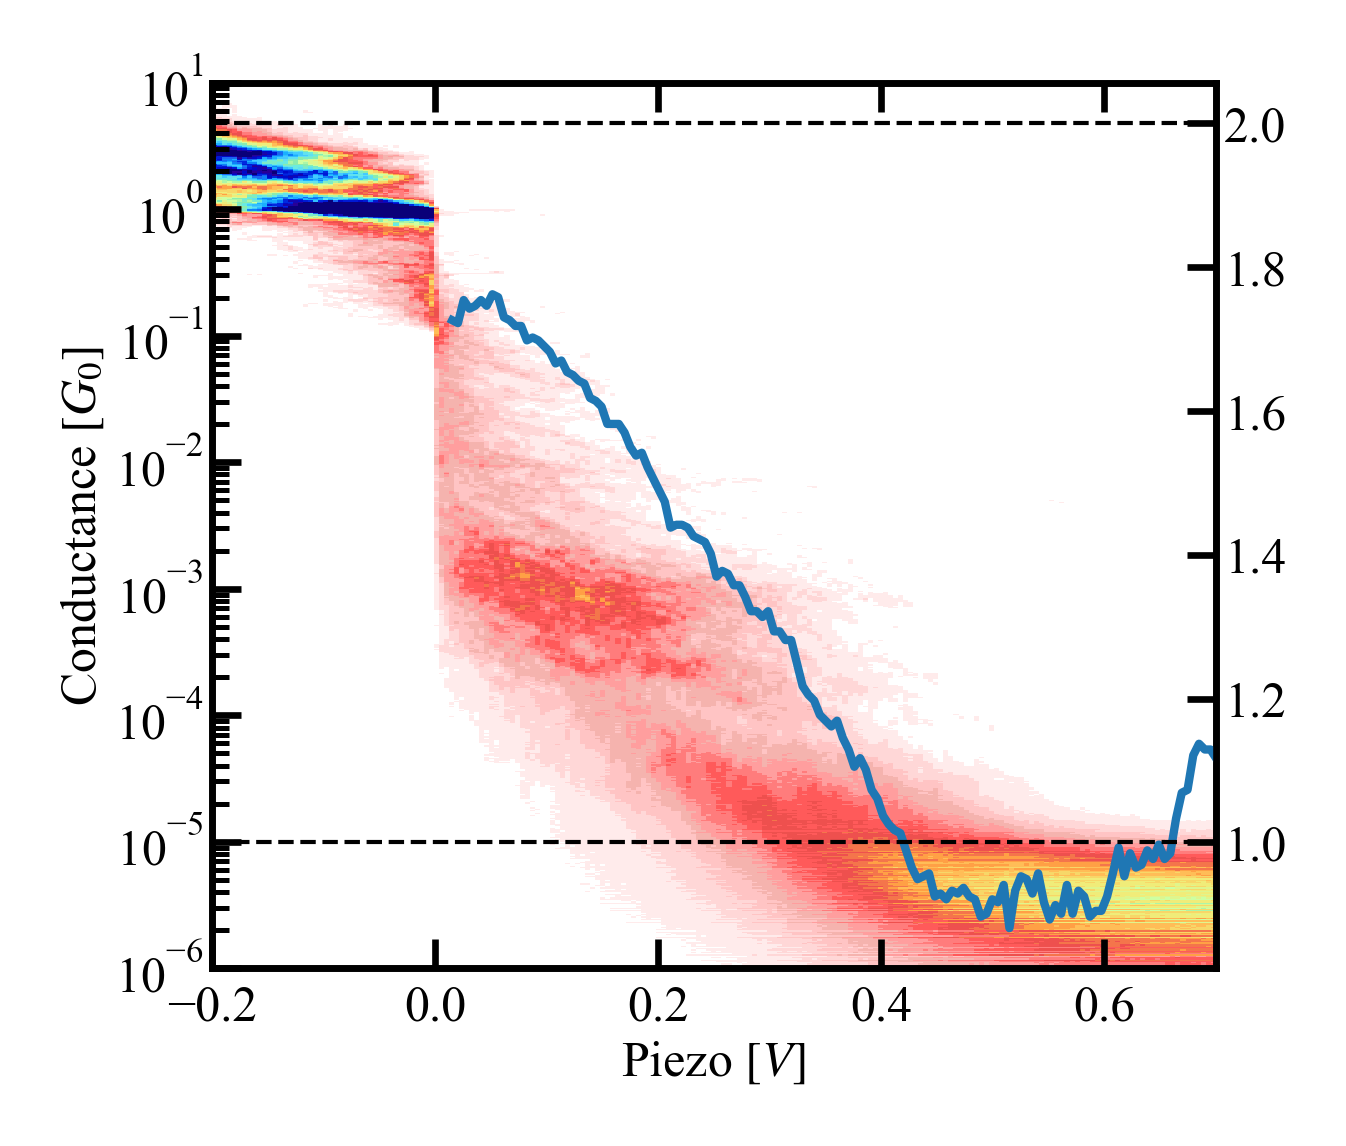

In [85]:
ax_pull = hist_BPY.plot_hist_2d_one(direction='pull', vmax=1e4)
# ax_pull.axvline(0, ls='--', lw=0.5, c='k')
# ax_pull.axvline(-0.8, ls='--', lw=0.5, c='k')
# ax_pull.axhline(1e-5, ls='--', lw=0.5, c='k')
# ax_pull.set_xlim(0.5, -1.5)
parx = ax_pull.twinx()
parx.plot(piezo_points[3:-1], n_pull[2:], lw=1)
parx.axhline(2, ls='--', lw=0.5, c='k')
parx.axhline(1, ls='--', lw=0.5, c='k')

In [38]:
win_size = 1024
step_size = win_size//2
width = 70000

start_trace = 1201
end_trace = 2200+1

noise_power_push = np.zeros((end_trace-start_trace, width//step_size + 2))

for trace in tqdm(range(start_trace, end_trace)):
    # load trace
    trace_pair = TracePair(trace, load_from=home_folder)
    # to study temporal noise of push traces, we align them at 1e-5 G0
    try:
        trace_pair.align_trace(align_at=1e-5)
    except IndexError:
        # trace did not cross align value
        warnings.warn(f'Trace {trace} did not cross align value, skipping trace.')
        continue
    
    cut_part = trace_pair.aligned_piezo_push[trace_pair.aligned_piezo_push < 0][:width]
    
    piezo_points =  utils.mov_avg(cut_part,
                                  win_size=win_size, step_size=step_size,
                                  avg_type=np.mean)
    
    cut_part = trace_pair.conductance_push[trace_pair.aligned_piezo_push < 0][:width]
    
    if len(cut_part) < width:
        warnings.warn(f'Trace {trace} was not long enough, skipping trace.')
        continue
    
    cond_avg = utils.mov_avg(cut_part,
                             win_size=win_size, step_size=step_size,
                             avg_type=utils.log_avg)

#     f_push, t_push, Zxx_push = scipy.signal.stft(cut_part,
#                                                  fs=trace_pair.sample_rate,
#                                                  window='hann', nperseg=win_size,
#                                                  noverlap=None,
#                                                  nfft=None, detrend=False, return_onesided=True,
#                                                  boundary='even', padded=True, axis=- 1)
    
    
#     mirr_ext_plat_piezo_pull = even_ext(piez_pull[trace], n=win_size//2)
    mirr_ext_plat_cond = utils.even_ext(cut_part, n=win_size//2)

    psd_intervals = np.array([mirr_ext_plat_cond[i*step_size: i*step_size+win_size]
                              for i in range(len(cut_part)//step_size)])

#     cond_avg_in_win_pull[trace] = np.array(list(map(utils.log_avg, psd_intervals)))
    
    f_push, psds_push = scipy.signal.welch(x=psd_intervals, fs=trace_pair.sample_rate, window='hann',
                                           nperseg=win_size, noverlap=win_size//2, nfft=None,
                                           detrend=False, scaling='density', average='mean', axis=1)
    

    mask = np.bitwise_and(f_push > 2000, f_push < 5000)
    
    temp_arr = np.array([])

#     for i in range(Zxx_push.shape[1]):
#         psd_push = np.abs(Zxx_push[:, i])
#         temp_arr = np.append(temp_arr, scipy.integrate.trapz(psd_push[mask], x=f_push[mask]))  # g0**2

    for psd_push in psds_push:
        temp_arr = np.append(temp_arr, scipy.integrate.trapz(psd_push[mask], x=f_push[mask]))
    
    if any(np.isnan(temp_arr)):
        warnings.warn(f'Trace {trace} has Nan in noise_power at index: {np.where(np.isnan(temp_arr))}.')
        continue
    else:
        if trace == start_trace:
            noise_power_push = temp_arr
            noise_power_push = noise_power_push.reshape((1, -1))

            cond_avg_push = cond_avg
            cond_avg_push = cond_avg_push.reshape((1, -1))
        else:
            noise_power_push = np.append(noise_power_push, temp_arr.reshape((1, -1)), axis=0)
            cond_avg_push = np.append(cond_avg_push, cond_avg.reshape((1, -1)), axis=0)
    
#     for i in range(Zxx_push.shape[1]):
#         psd_push = np.abs(Zxx_push[:, i])
#         noise_power_push[trace-start_trace, i] = scipy.integrate.trapz(psd_push[mask], x=f_push[mask])  # g0**2
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [39]:
print(noise_power_push.shape)
print(piezo_points.shape)

(1000, 136)
(138,)


In [40]:
N = np.linspace(0, 4, num=1000)
n_push = np.zeros(noise_power_push.shape[1])        

for interval in tqdm(range(noise_power_push.shape[1])):
    push_corr = np.zeros_like(N)
    for i, n in enumerate(N):
        push_corr[i] = utils.calc_correlation(np.log10(noise_power_push[:, interval]/cond_avg_push[:, interval]**n),
                                              np.log10(cond_avg_push[:, interval]))

    n_push[interval] = N[abs(push_corr) == min(abs(push_corr))][0]

  0%|          | 0/136 [00:00<?, ?it/s]

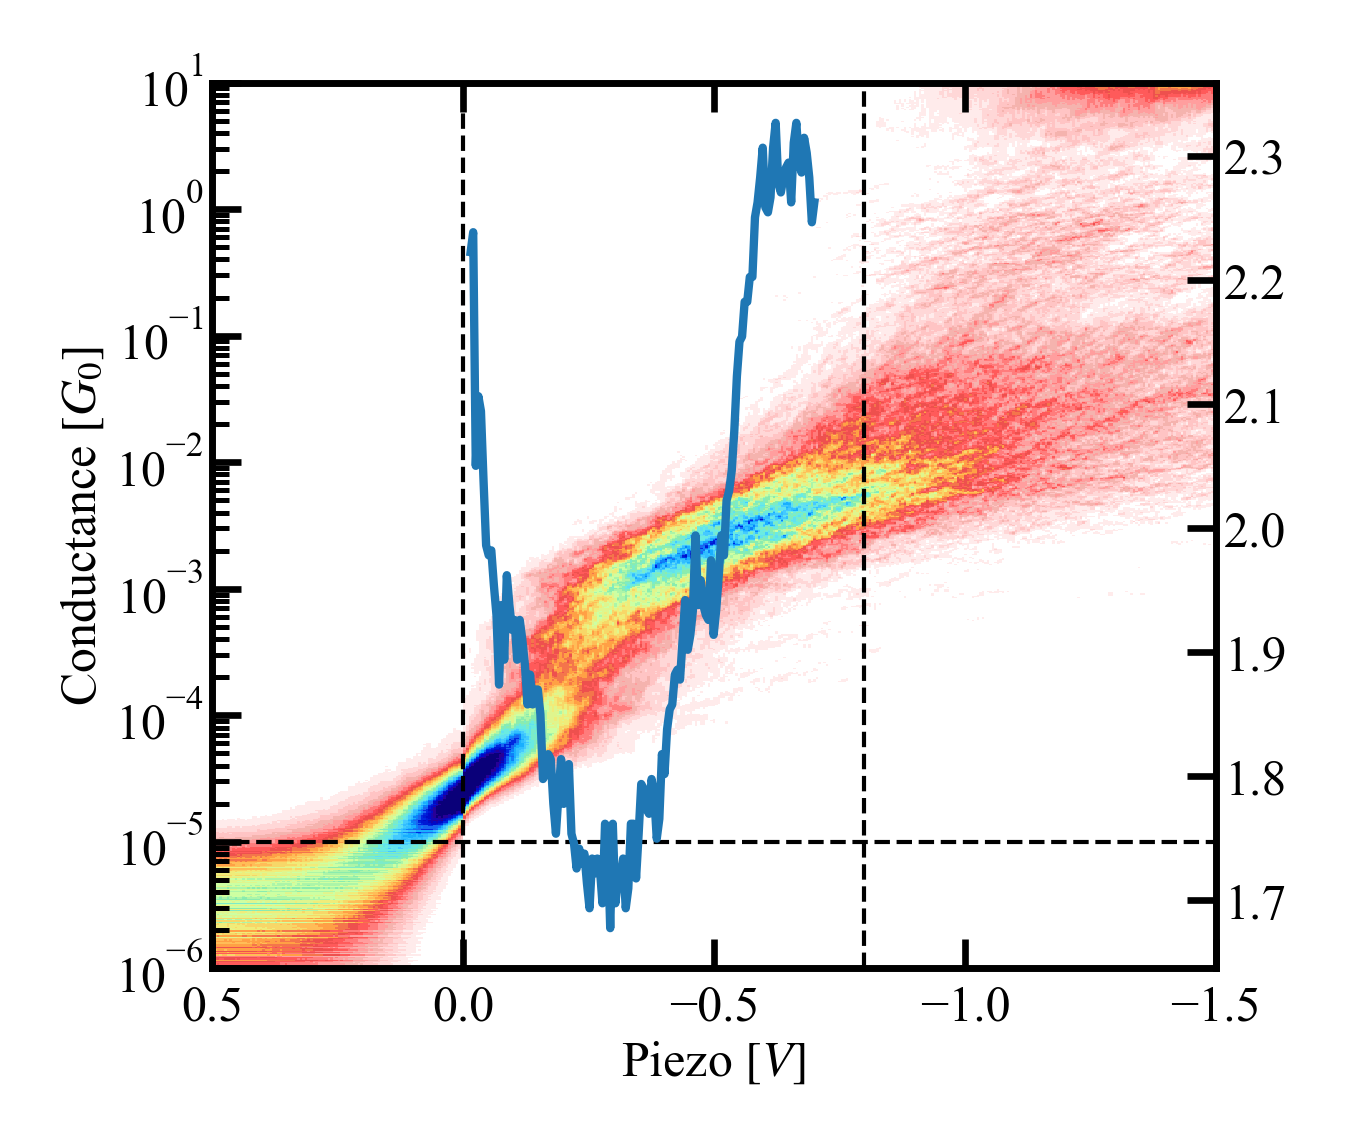

In [43]:
ax_push = hist_BPY.plot_hist_2d_one(direction='push', vmax=1e4)
ax_push.axvline(0, ls='--', lw=0.5, c='k')
ax_push.axvline(-0.8, ls='--', lw=0.5, c='k')
ax_push.axhline(1e-5, ls='--', lw=0.5, c='k')
ax_push.set_xlim(0.5, -1.5)
parx = ax_push.twinx()
parx.plot(piezo_points[3:-1], n_push[2:], lw=1)

In [31]:
n_push

array([2.68668669, 2.48248248, 2.27827828, 2.24624625, 2.18218218,
       2.17817818, 2.15415415, 2.07407407, 2.04204204, 2.02602603,
       2.03803804, 2.00600601, 1.98998999, 1.96996997, 1.97797798,
       1.93393393, 1.94994995, 1.94994995, 1.92192192, 1.91791792,
       1.92192192, 1.92592593, 1.93393393, 1.90990991, 1.90590591,
       1.90990991, 1.88988989, 1.89389389, 1.87787788, 1.88188188,
       1.84984985, 1.86586587, 1.85385385, 1.86986987, 1.83783784,
       1.82582583, 1.83783784, 1.87387387, 1.84584585, 1.83783784,
       1.86586587, 1.83783784, 1.84984985, 1.81781782, 1.81781782,
       1.80580581, 1.82182182, 1.82582583, 1.83383383, 1.83783784,
       1.86186186, 1.84584585, 1.85385385, 1.84984985, 1.86986987,
       1.87387387, 1.84984985, 1.89389389, 1.87387387, 1.87387387,
       1.88988989, 1.88588589, 1.88188188, 1.8978979 , 1.91791792,
       1.93793794, 1.92192192, 1.92192192, 1.94994995, 1.96996997,
       1.96996997, 1.96996997, 1.96596597, 1.96596597, 1.94194